In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',200)

Data is about wether a client has payment difficulties 
cash loan --> قرض نقدي 
Revolving loan --> القرض المتجدد 
Annuity Amount --> مبلغ القسط السنوي
Installments -->
اقساط
Flag phone == Flag work phone
APARTMENTS_AVG == BASEMENTAREA_AVG ==YEARS_BEGINEXPLUATATION_AVG == YEARS_BUILD_AVG



In [3]:
df = pd.read_csv('application_data.csv')

In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.describe() 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}  -  {}%'.format(col, round(pct_missing*100)))
    if round(pct_missing*100) > 45.0:
        df.drop([col],axis=1,inplace=True)
        print('Removed')
    else :
        print("Not Removed")

SK_ID_CURR  -  0%
Not Removed
TARGET  -  0%
Not Removed
NAME_CONTRACT_TYPE  -  0%
Not Removed
CODE_GENDER  -  0%
Not Removed
FLAG_OWN_CAR  -  0%
Not Removed
FLAG_OWN_REALTY  -  0%
Not Removed
CNT_CHILDREN  -  0%
Not Removed
AMT_INCOME_TOTAL  -  0%
Not Removed
AMT_CREDIT  -  0%
Not Removed
AMT_ANNUITY  -  0%
Not Removed
AMT_GOODS_PRICE  -  0%
Not Removed
NAME_TYPE_SUITE  -  0%
Not Removed
NAME_INCOME_TYPE  -  0%
Not Removed
NAME_EDUCATION_TYPE  -  0%
Not Removed
NAME_FAMILY_STATUS  -  0%
Not Removed
NAME_HOUSING_TYPE  -  0%
Not Removed
REGION_POPULATION_RELATIVE  -  0%
Not Removed
DAYS_BIRTH  -  0%
Not Removed
DAYS_EMPLOYED  -  0%
Not Removed
DAYS_REGISTRATION  -  0%
Not Removed
DAYS_ID_PUBLISH  -  0%
Not Removed
OWN_CAR_AGE  -  66%
Removed
FLAG_MOBIL  -  0%
Not Removed
FLAG_EMP_PHONE  -  0%
Not Removed
FLAG_WORK_PHONE  -  0%
Not Removed
FLAG_CONT_MOBILE  -  0%
Not Removed
FLAG_PHONE  -  0%
Not Removed
FLAG_EMAIL  -  0%
Not Removed
OCCUPATION_TYPE  -  31%
Not Removed
CNT_FAM_MEMBERS  - 

> We will drop EXT_Source_1 , 2, 3 , APARTMENTS_AVG , BASEMENTAREA_AVG , YEARS_BEGINEXPLUATATION_AVG , YEARS_BUILD_AVG , COMMONAREA_AVG , ELEVATORS_AVG , FLOORSMIN_AVG , FLOORSMIN_AVG , LIVINGAPARTMENTS_AVG , LIVINGAREA_AVG , NONLIVINGAPARTMENTS_AVG ,NONLIVINGAREA_AVG , APARTMENTS_MODE , BASEMENTAREA_MODE , YEARS_BEGINEXPLUATATION_MODE ,

In [9]:
df.shape

(307511, 73)

In [10]:
for i in df.columns:
    if df[i].dtype =='O':
        print( df[i].value_counts())
        print('*'*50)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
**************************************************
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
**************************************************
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
**************************************************
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
**************************************************
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
**************************************************
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave             

In [11]:
for i in df:
    if df[i].dtype == 'O':  
        print(f"{i} contain:", df[i].unique())
        print("------------------")

NAME_CONTRACT_TYPE contain: ['Cash loans' 'Revolving loans']
------------------
CODE_GENDER contain: ['M' 'F' 'XNA']
------------------
FLAG_OWN_CAR contain: ['N' 'Y']
------------------
FLAG_OWN_REALTY contain: ['Y' 'N']
------------------
NAME_TYPE_SUITE contain: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
------------------
NAME_INCOME_TYPE contain: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
------------------
NAME_EDUCATION_TYPE contain: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
------------------
NAME_FAMILY_STATUS contain: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
------------------
NAME_HOUSING_TYPE contain: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
------------------
OC

### Dealing with negatives

In [12]:
negatives = ['DAYS_BIRTH' , 'DAYS_EMPLOYED' , 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for negative in negatives :
    df[negative] = df[negative].apply(abs)

In [13]:
df['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

### Feature Enginnering

In [14]:
df['Age'] = (df['DAYS_BIRTH']//365)

In [15]:
df['Emp_Years'] = (df['DAYS_EMPLOYED']//365)

In [16]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Emp_Years
306665,455303,0,Cash loans,M,N,Y,1,144000.0,358443.0,16839.0,252000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,12031,243,5935.0,2625,1,1,0,1,0,1,Low-skill Laborers,3.0,2,2,MONDAY,16,0,0,0,0,0,0,Trade: type 7,0.265256,0.597192,0.0,0.0,0.0,0.0,799.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32,0
191381,321903,1,Cash loans,M,Y,Y,0,216000.0,781920.0,42547.5,675000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.020713,13881,3212,1613.0,5061,1,1,0,1,0,0,NaN,2.0,3,3,FRIDAY,8,0,0,0,0,0,0,Business Entity Type 2,0.413185,NaN,1.0,0.0,1.0,0.0,860.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,38,8
103417,220034,0,Cash loans,M,Y,N,2,256500.0,327024.0,15372.0,270000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.009657,12494,5198,836.0,3506,1,1,1,1,0,0,Managers,4.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,Military,0.766181,0.263647,0.0,0.0,0.0,0.0,2125.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,34,14
200238,332126,0,Cash loans,F,N,Y,0,81000.0,598486.5,21627.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,15158,4370,9104.0,4843,1,1,0,1,0,0,Cleaning staff,2.0,3,2,TUESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.549159,0.397946,2.0,0.0,2.0,0.0,1767.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0,41,11
120892,240169,0,Cash loans,F,N,N,1,99000.0,1256400.0,40657.5,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,With parents,0.035792,9995,2719,2842.0,1913,1,1,0,1,0,0,Laborers,3.0,2,2,FRIDAY,15,0,0,0,1,1,0,Postal,0.637634,NaN,8.0,1.0,8.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,27,7


### as we see there is some data that has Emp years as 1000 years , we need to deal with them

In [17]:
falses = df['Emp_Years'] == 1000
(falses.sum()/df.shape[0])*100

18.00716071945394

#### 18% is still a huge number , replace them with nulls  (The nulls is envading we need helppp..😥)

In [18]:
df[falses]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Emp_Years
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55,1000
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,20417,365243,5246.0,2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,55,1000
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827,365243,9012.0,3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,68,1000
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,23920,365243,9817.0,4969,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.650765,0.751724,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,65,1000
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,23548,365243,5745.0,4576,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.766138,0.684828,0.0,0.0,0.0,0.0,491.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,64,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,22414,365243,11976.0,4171,1,0,0,1,0,0,NaN,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,0.195625,0.360613,11.0,2.0,11.0,0.0,1667.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,61,1000
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,24911,365243,11211.0,4213,1,0,0,1,0,0,NaN,1.0,2,2,MONDAY,12,0,0,0,0,0,0,XNA,0.589906,0.520898,1.0,1.

In [19]:
## all falses has DAYS_EMPLOYED with 365243
dic_nulls = {365243 : np.NaN}
df['DAYS_EMPLOYED'].replace(dic_nulls,inplace=True)

In [20]:
df['Emp_Years'] = (df['DAYS_EMPLOYED']//365)

In [21]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Emp_Years
135302,256928,1,Cash loans,M,N,N,0,67500.0,448056.0,17019.0,315000.0,Unaccompanied,Commercial associate,Lower secondary,Single / not married,Municipal apartment,0.009334,19537,4180.0,238.0,2383,1,1,0,1,0,0,Laborers,1.0,2,2,FRIDAY,12,0,0,0,0,0,0,Agriculture,0.578278,0.232725,3.0,0.0,2.0,0.0,1741.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,53,11.0
193116,323945,0,Cash loans,F,N,N,0,67500.0,544491.0,15916.5,454500.0,Unaccompanied,State servant,Higher education,Separated,House / apartment,0.025164,14841,348.0,7557.0,2346,1,1,0,1,0,0,Core staff,1.0,2,2,FRIDAY,10,0,0,0,0,1,1,Government,0.305600,0.725276,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.0
172331,299699,0,Revolving loans,M,Y,N,0,270000.0,450000.0,22500.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,12834,3187.0,3720.0,4189,1,1,0,1,0,0,NaN,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.597507,0.749022,3.0,0.0,3.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,8.0,0.0,0.0,35,8.0
287341,432840,0,Revolving loans,F,N,Y,1,94500.0,202500.0,10125.0,202500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.010276,20090,NaN,11446.0,3175,1,0,0,1,0,0,NaN,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,XNA,0.279042,0.754406,0.0,0.0,0.0,0.0,146.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,55,NaN
272864,416332,0,Cash loans,F,N,Y,0,157500.0,675000.0,32602.5,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.014520,22524,NaN,2735.0,2286,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,XNA,0.057480,0.275000,0.0,0.0,0.0,0.0,1998.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,61,NaN


In [22]:
df[df['DAYS_EMPLOYED'] > df['DAYS_BIRTH']]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Emp_Years


### Dealing with XNA and Unknown in Name_Family_Status

In [23]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [24]:
((df['CODE_GENDER'] == 'XNA').sum() / df.shape[0])*100

0.0013007664766463637

In [25]:
((df['ORGANIZATION_TYPE'] == 'XNA').sum() / df.shape[0])*100

18.00716071945394

In [26]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [27]:
XNAS = ['CODE_GENDER','ORGANIZATION_TYPE']
for xna in XNAS :
    df[xna].replace({'XNA':df[xna].mode()[0]},inplace=True)

###### check the XNA:

In [28]:
((df['ORGANIZATION_TYPE'] == 'XNA').sum() / df.shape[0])*100 

0.0

In [29]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [30]:
df['NAME_FAMILY_STATUS'].replace({'Unknown':df['NAME_FAMILY_STATUS'].mode()[0]},inplace=True)

### Some initial EDA:


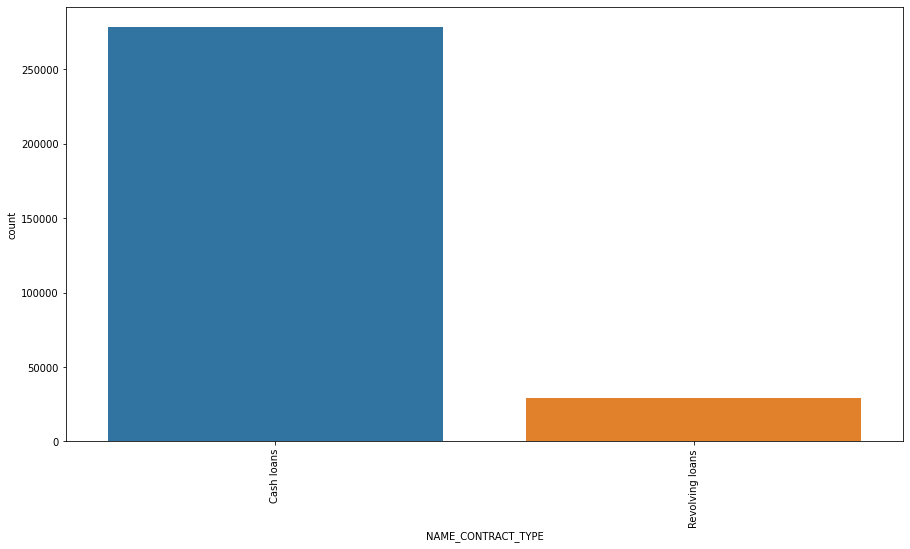

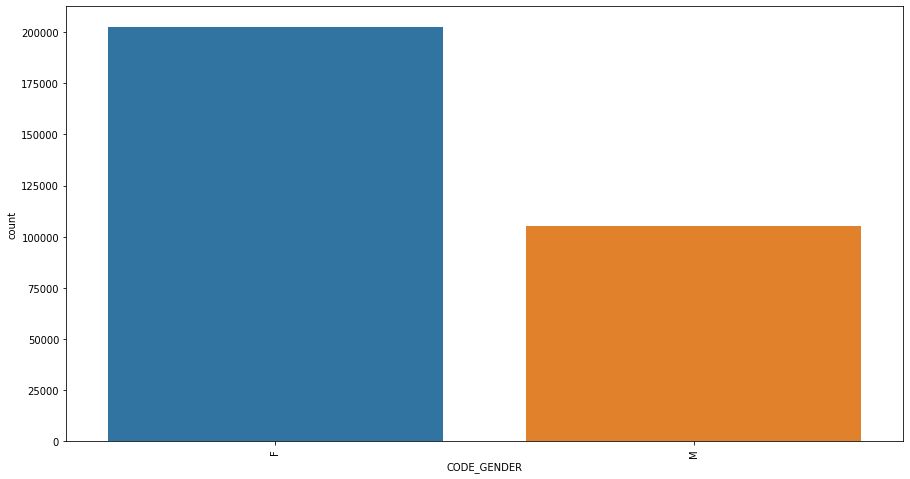

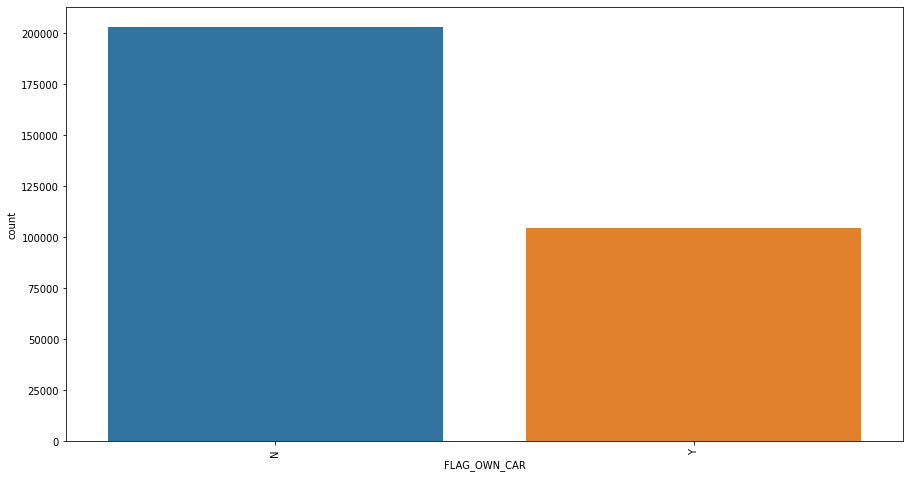

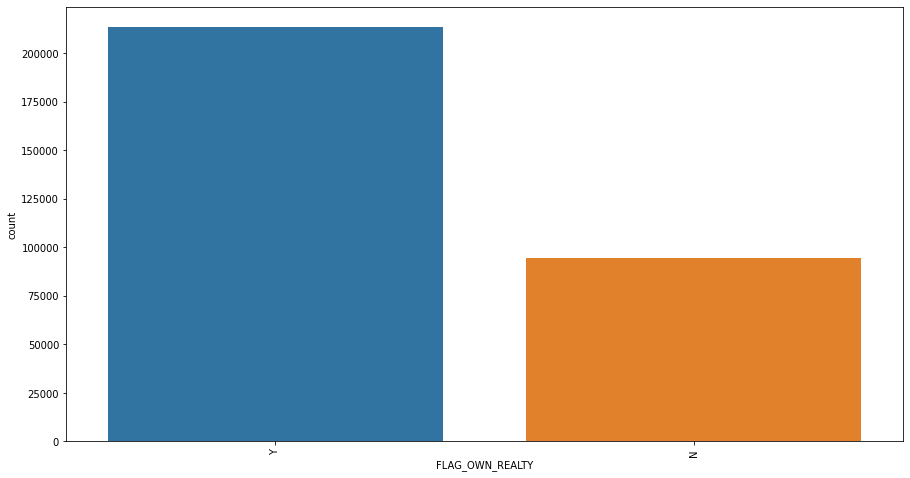

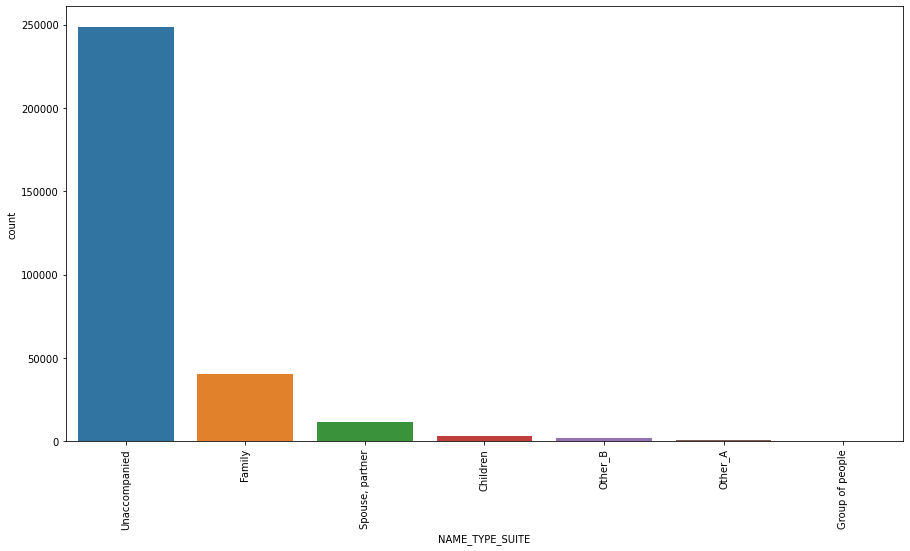

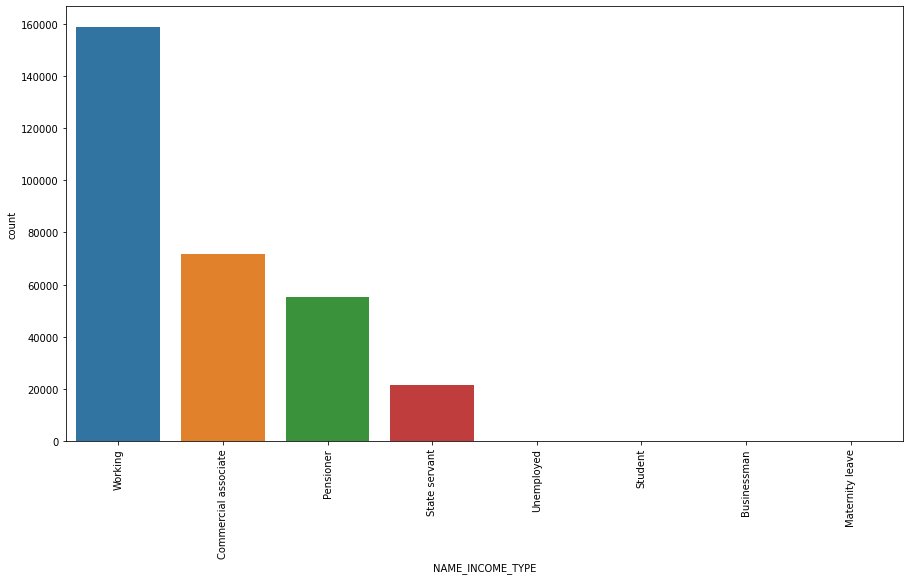

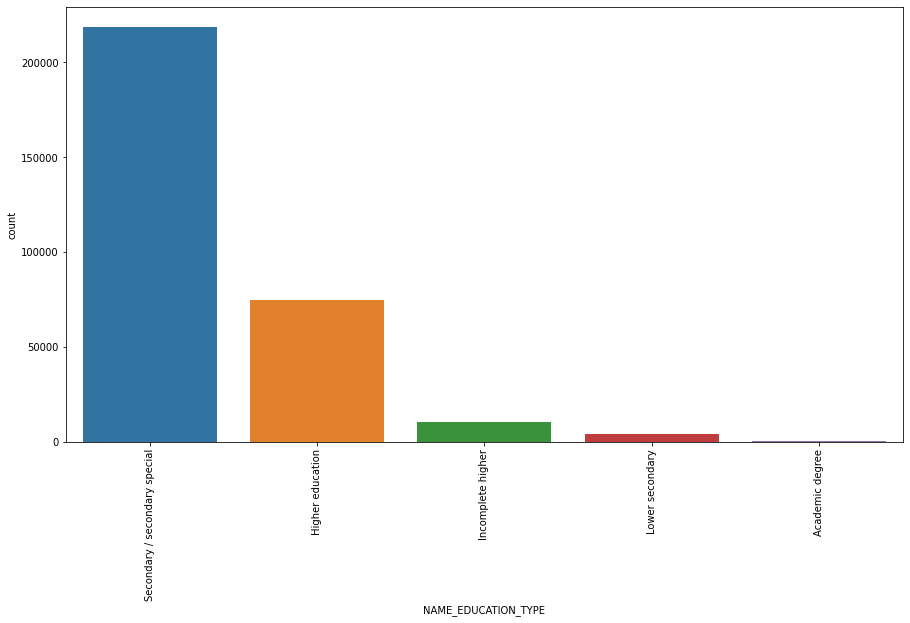

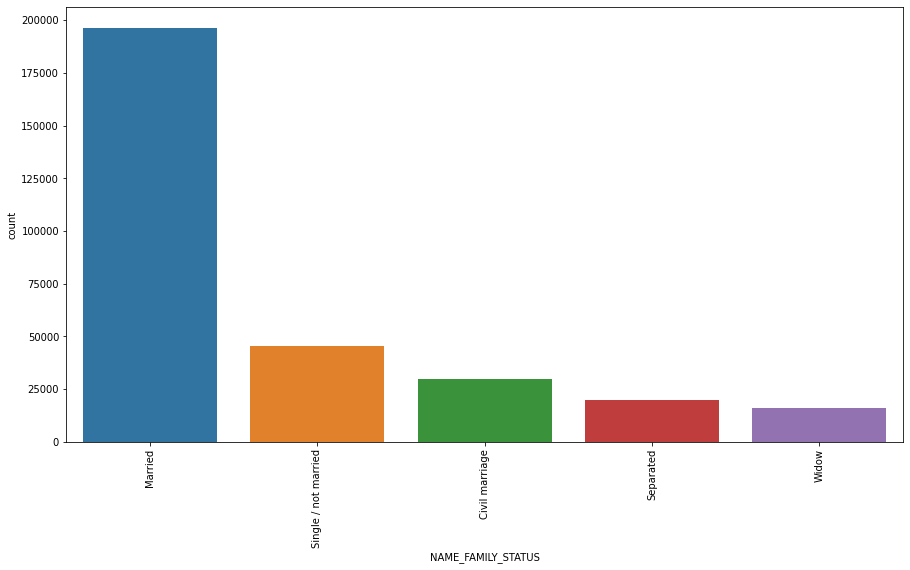

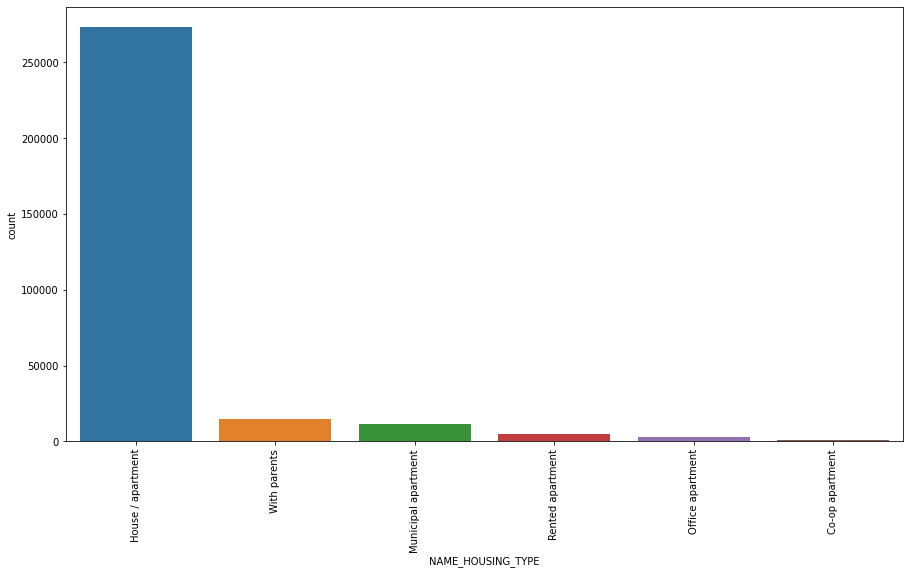

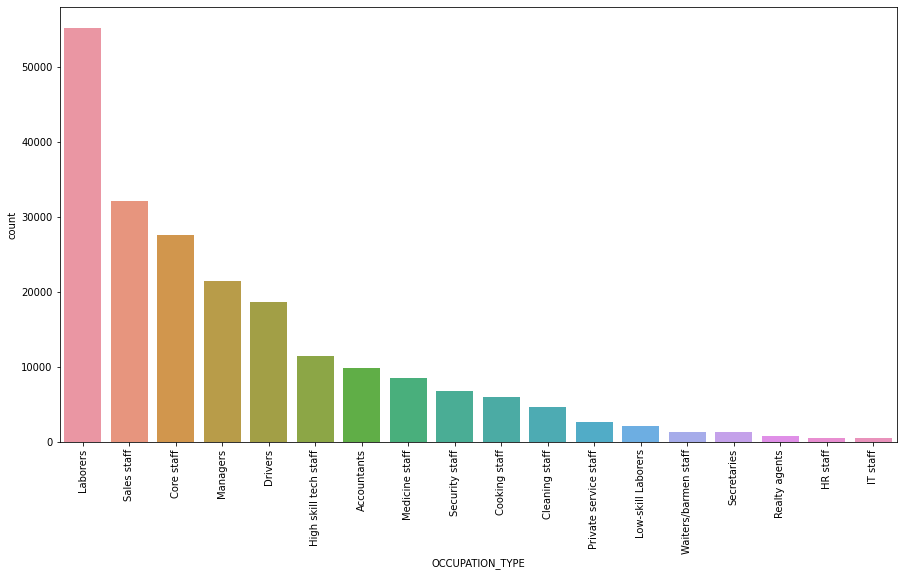

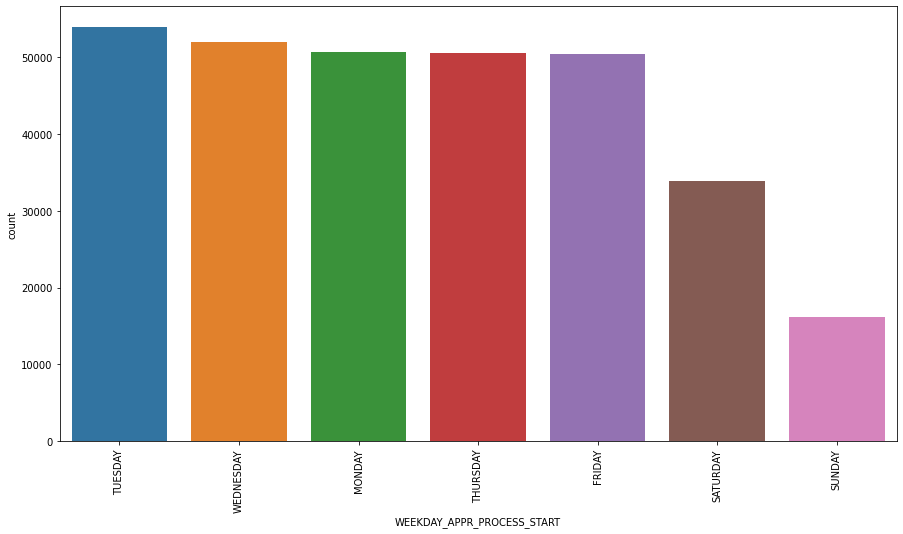

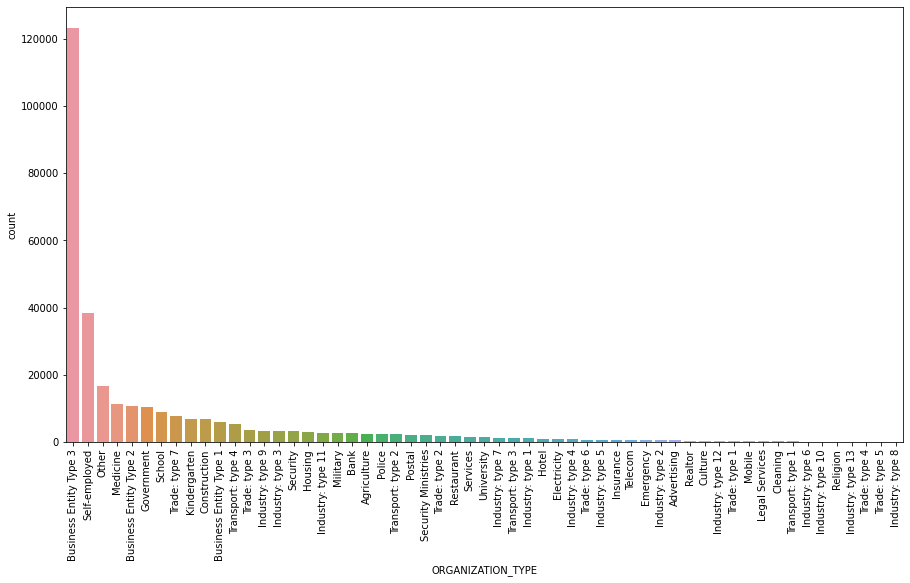

In [31]:
for i in df.columns:
    if df[i].dtype == 'O':
        plt.figure(figsize=(15,8))
        sns.countplot(x=df[i],data=df,order = df[i].value_counts().index )
        plt.xticks(rotation = 90)

C:\Users\argal\AppData\Local\Temp\ipykernel_13572\2773575298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\argal\AppData\Local\Temp\ipykernel_13572\2773575298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\argal\AppData\Local\Temp\ipykernel_13572\277357

C:\Users\argal\AppData\Local\Temp\ipykernel_13572\2773575298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\argal\AppData\Local\Temp\ipykernel_13572\2773575298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\argal\AppData\Local\Temp\ipykernel_13572\277357

C:\Users\argal\AppData\Local\Temp\ipykernel_13572\2773575298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\argal\AppData\Local\Temp\ipykernel_13572\2773575298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\argal\AppData\Local\Temp\ipykernel_13572\277357

C:\Users\argal\AppData\Local\Temp\ipykernel_13572\2773575298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\argal\AppData\Local\Temp\ipykernel_13572\2773575298.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\argal\AppData\Local\Temp\ipykernel_13572\277357

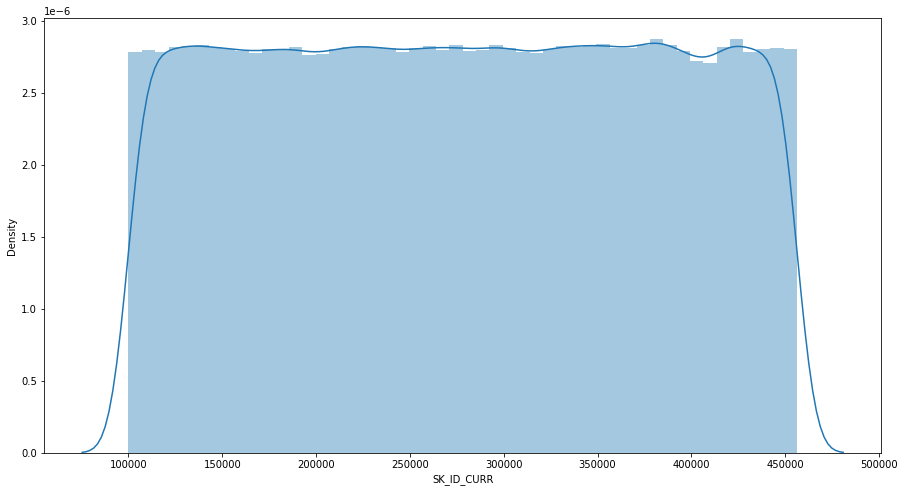

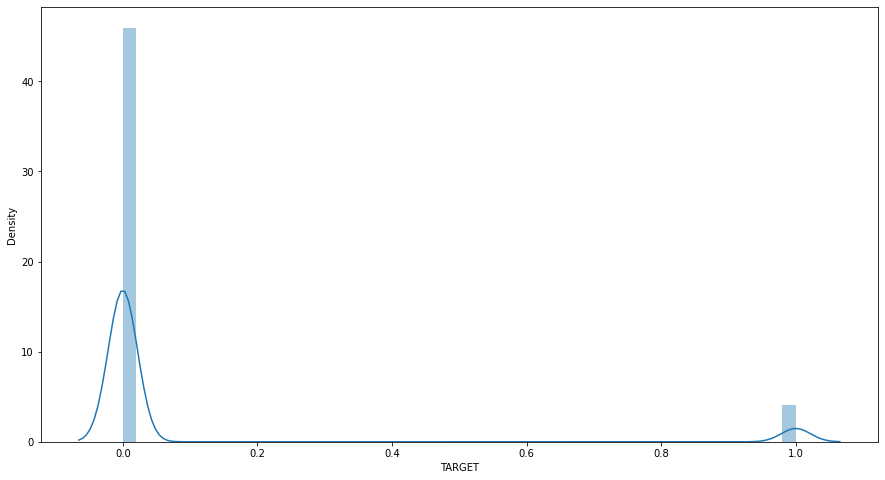

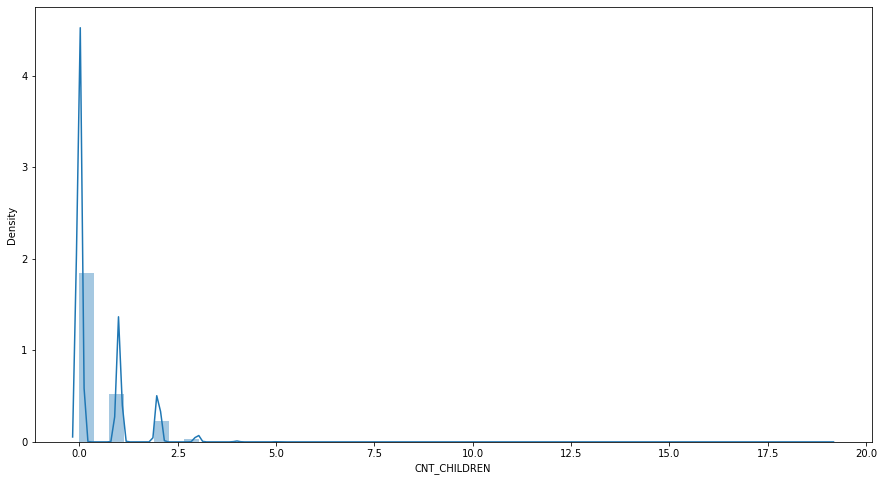

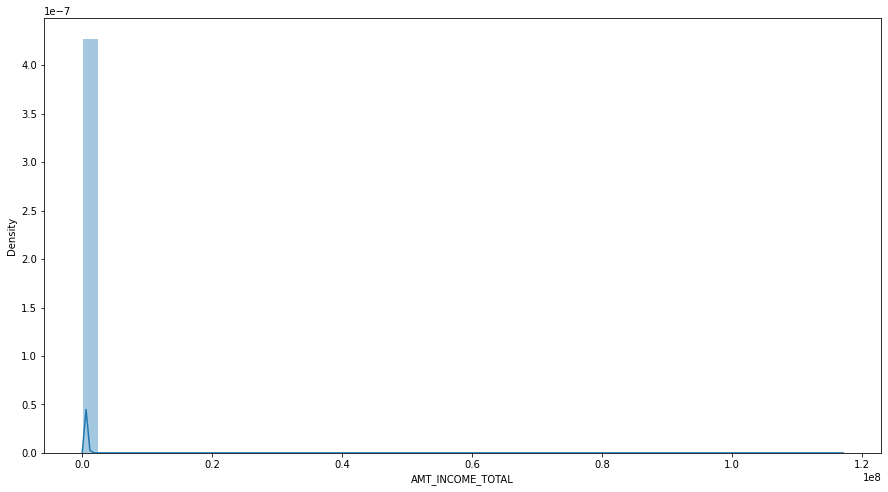

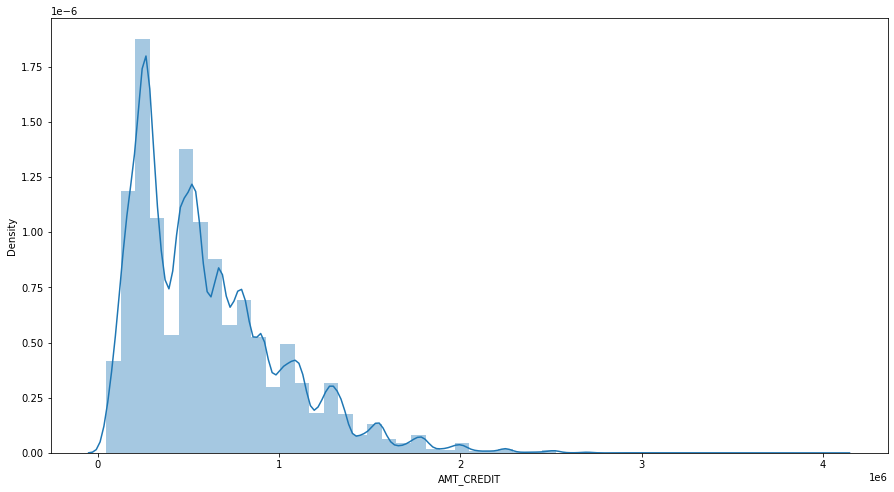

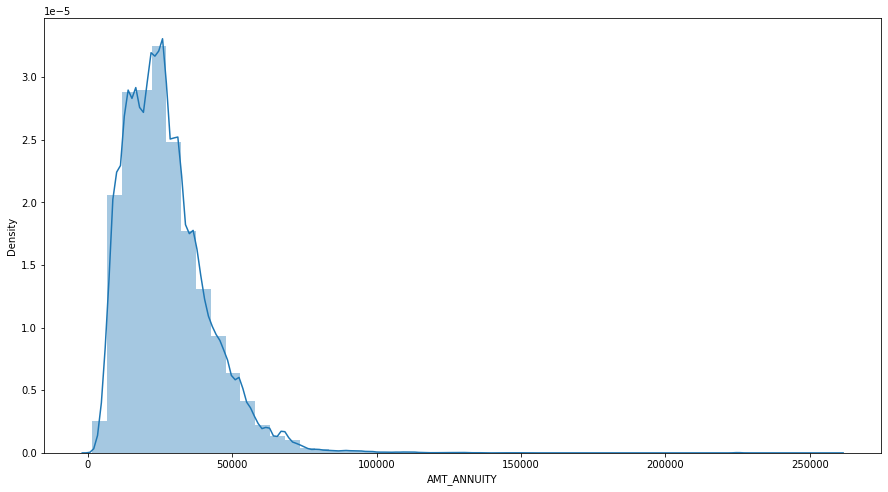

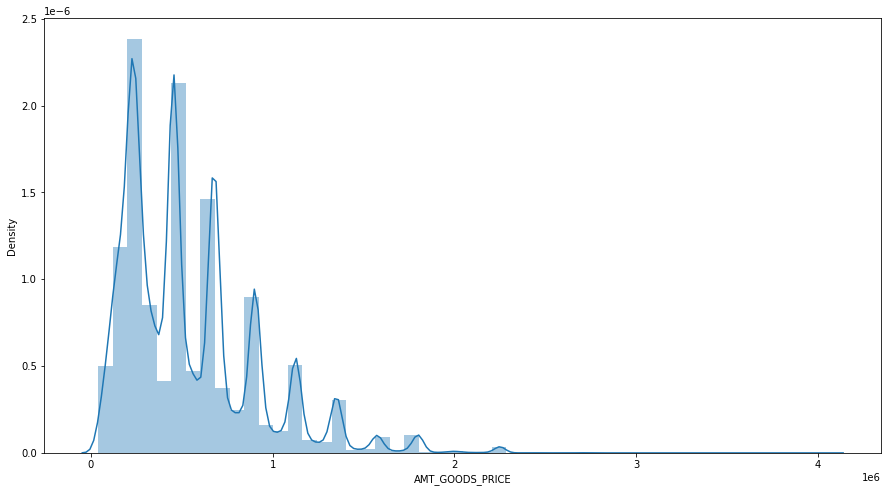

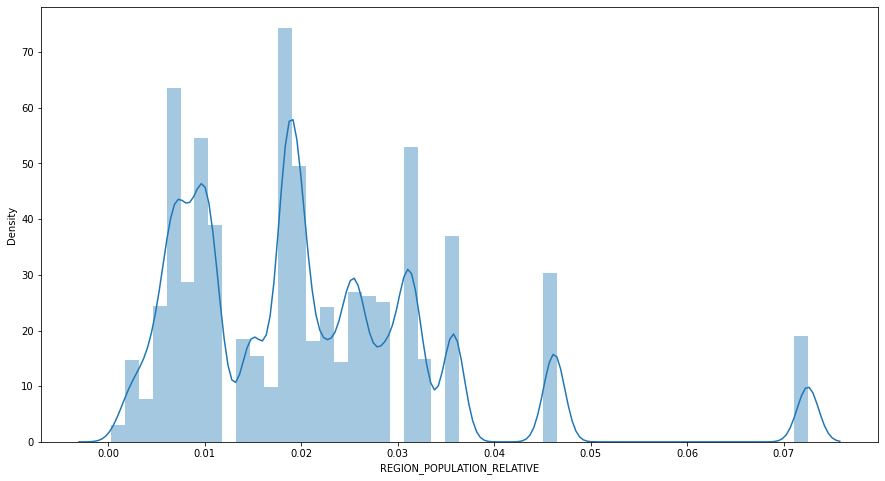

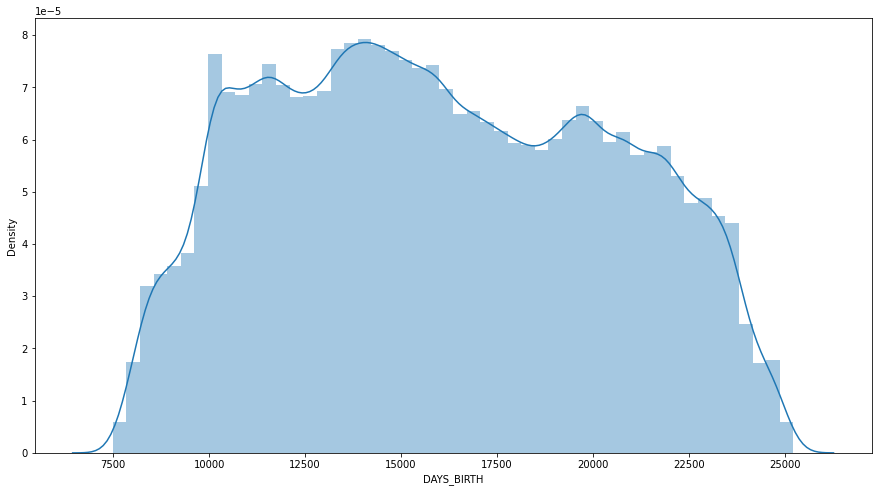

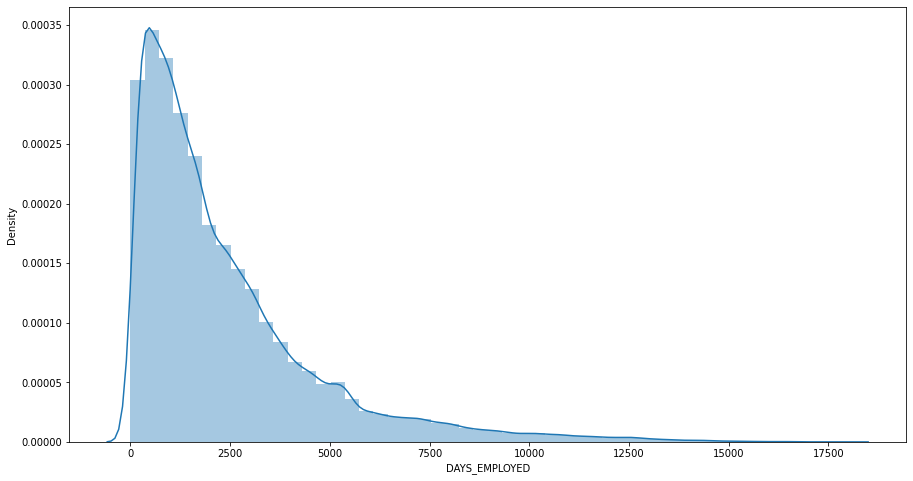

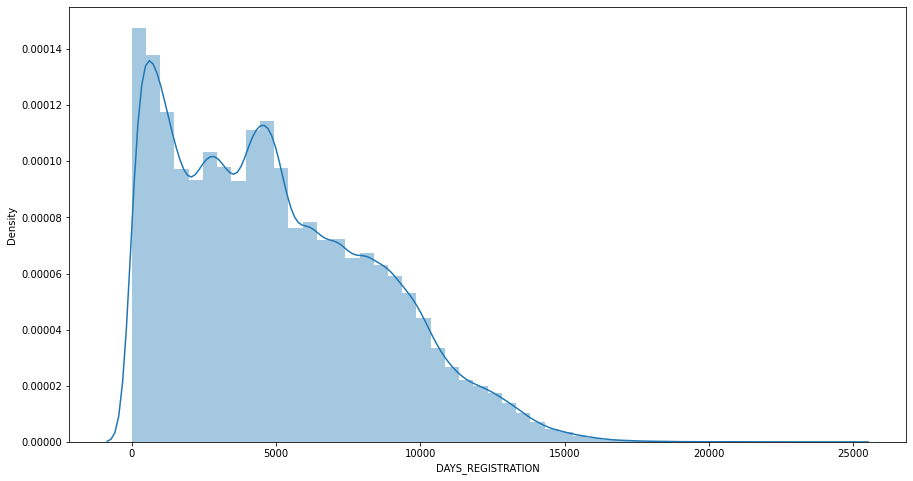

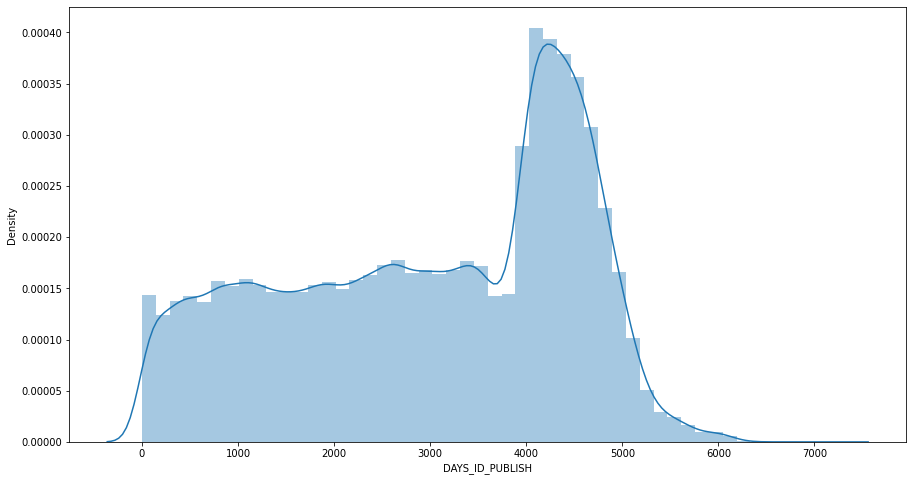

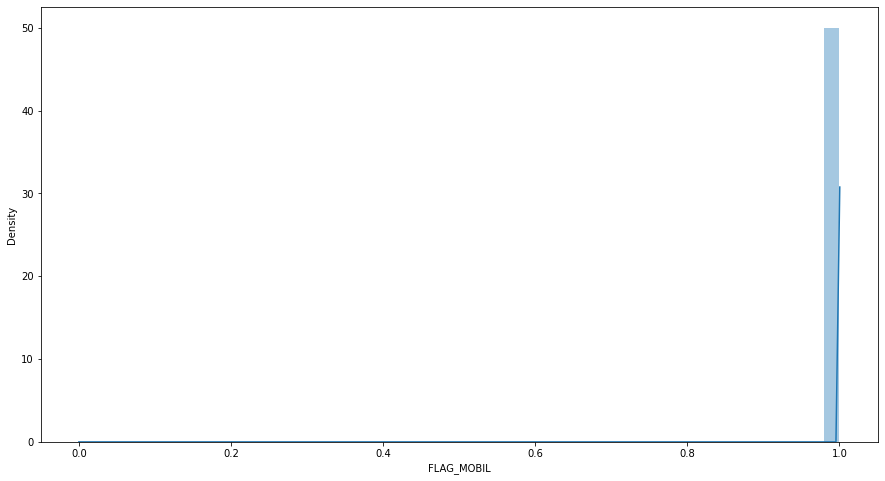

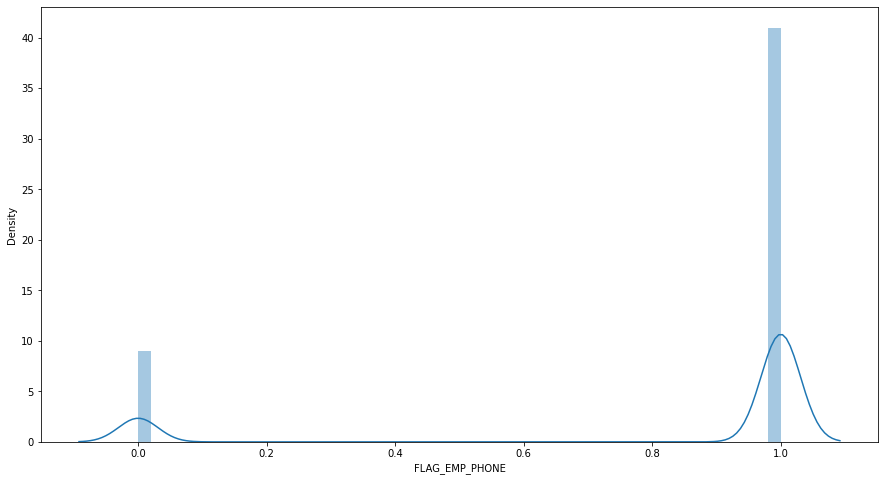

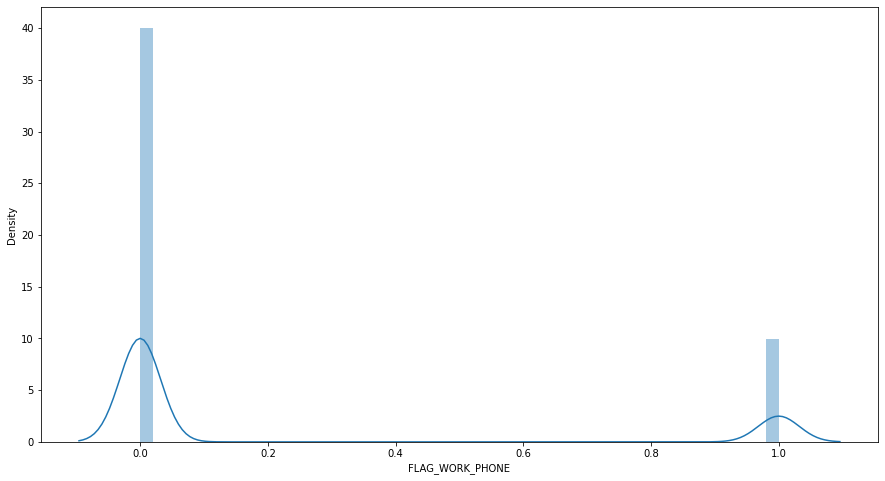

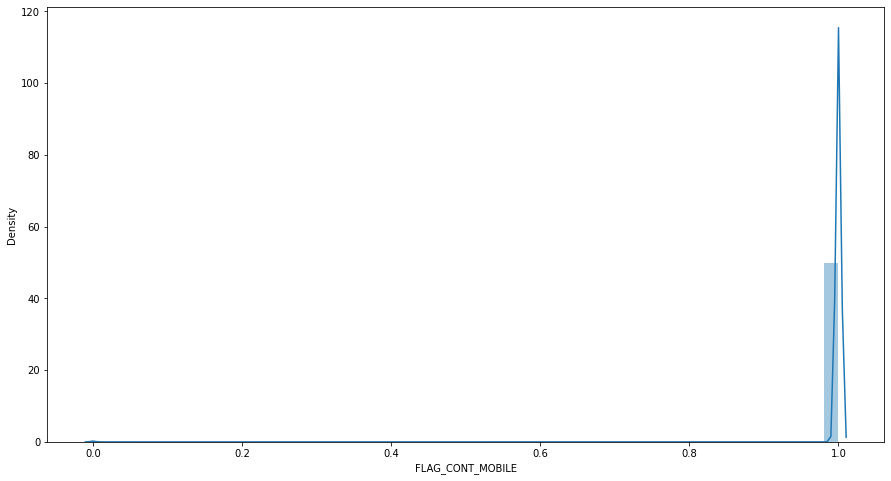

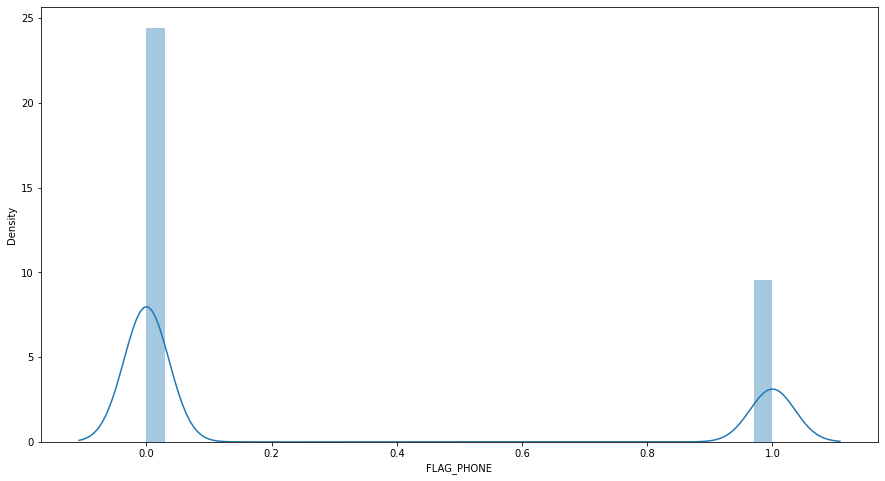

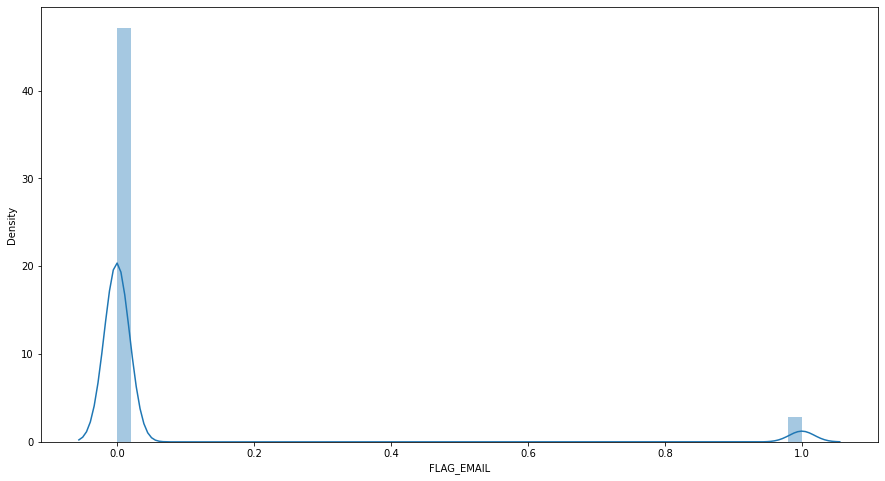

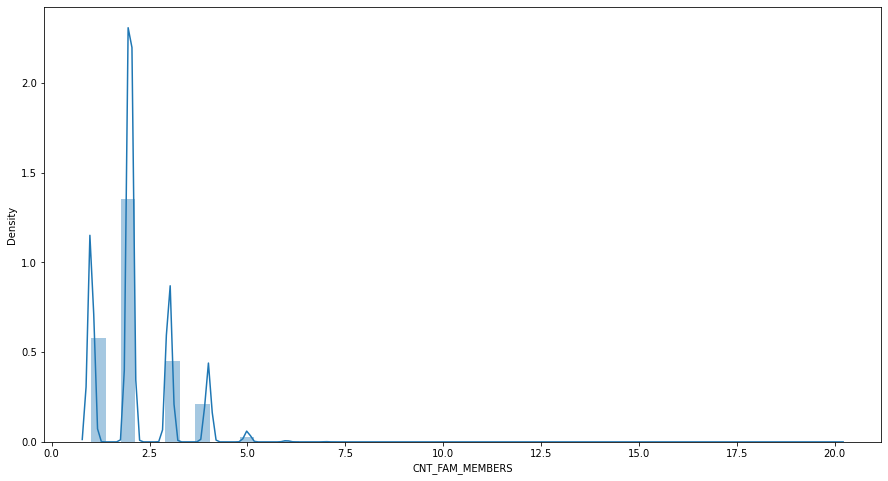

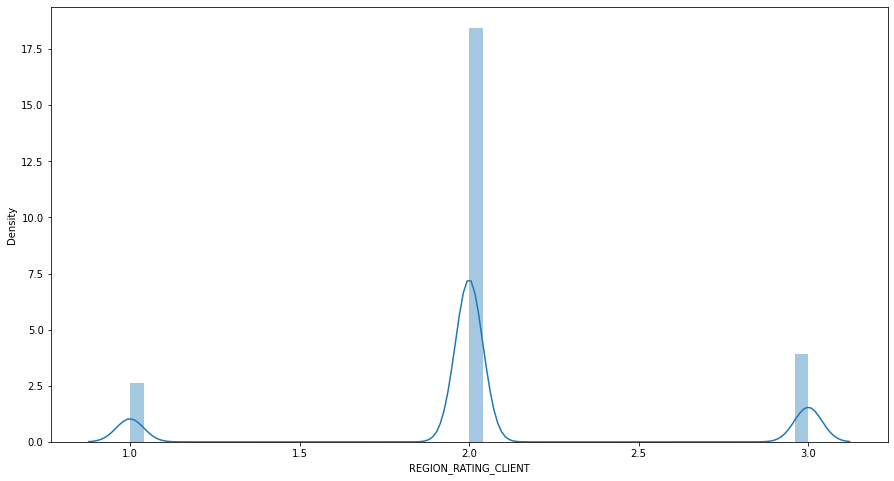

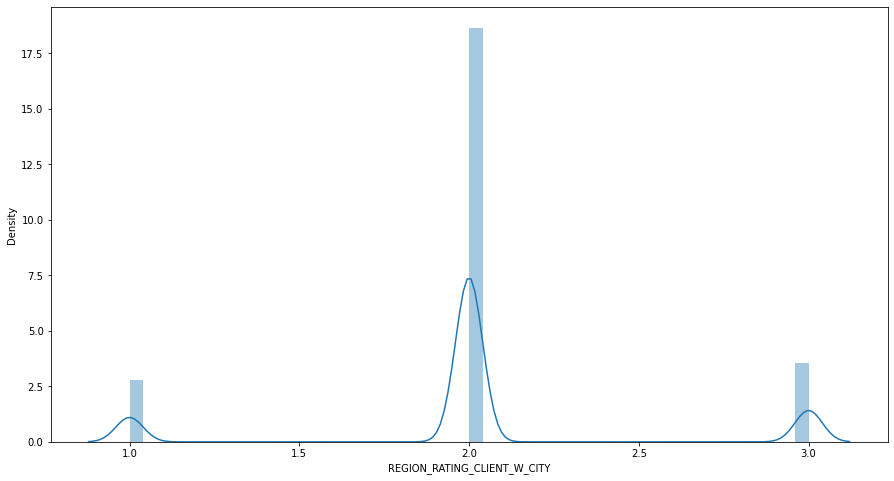

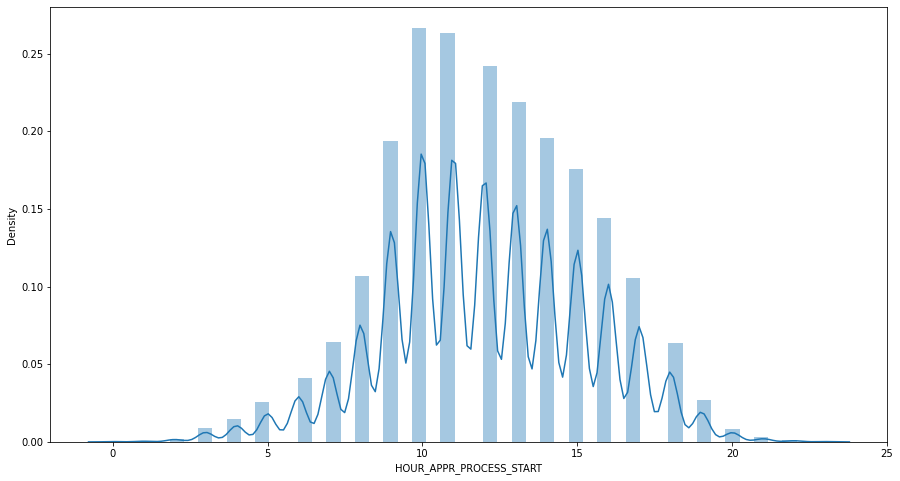

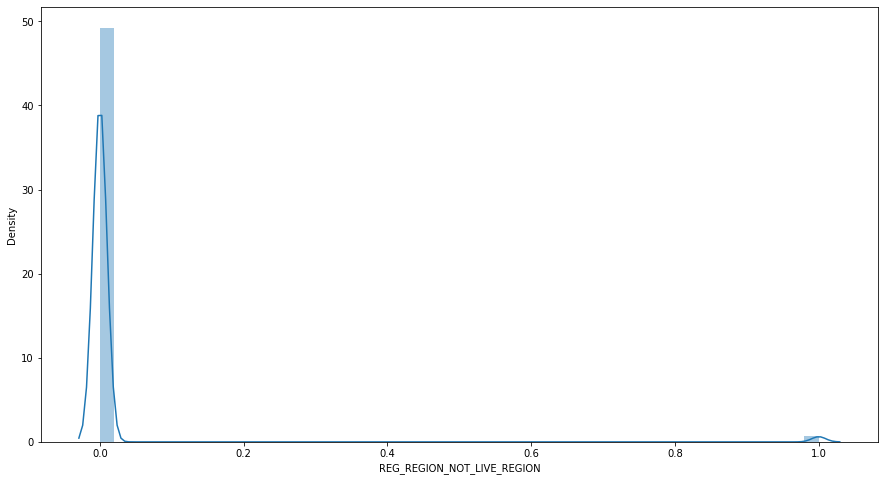

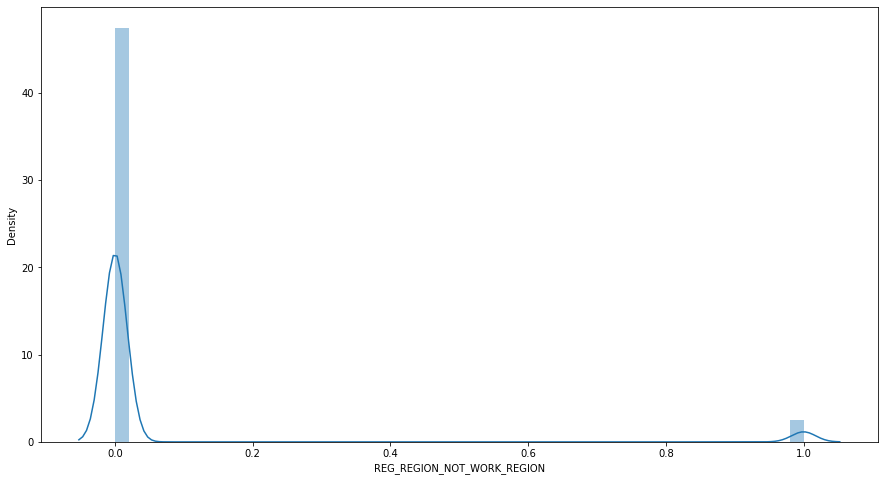

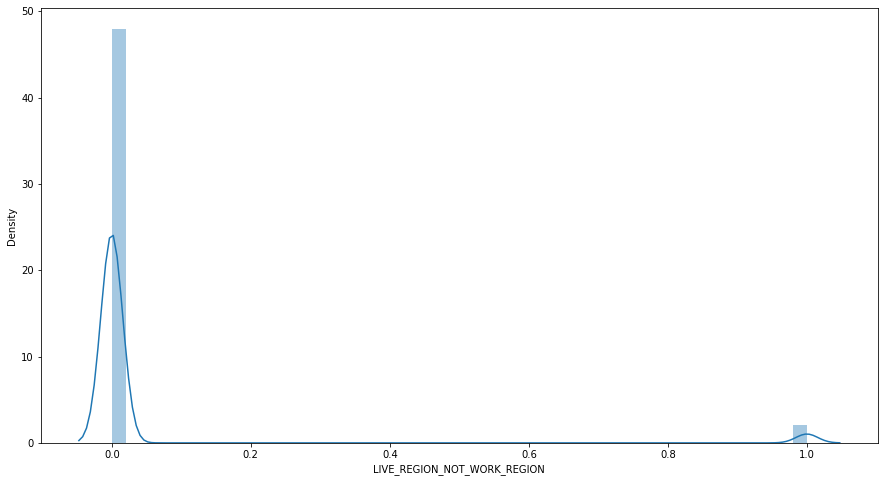

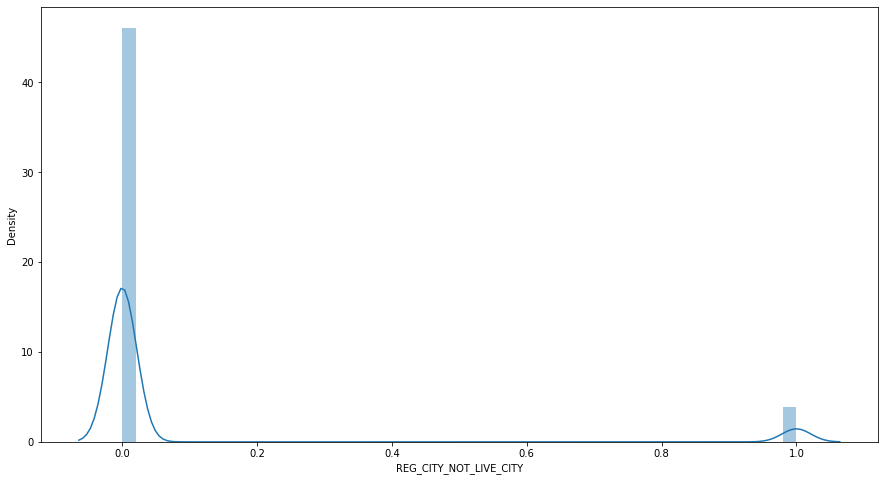

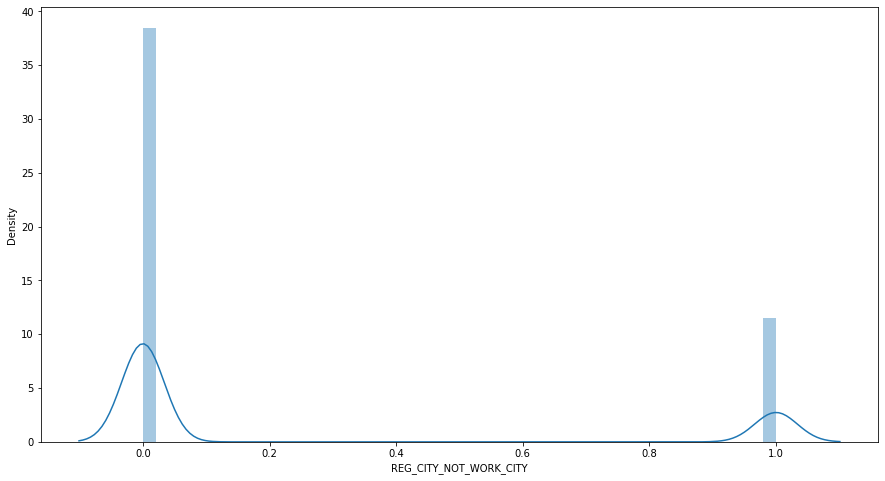

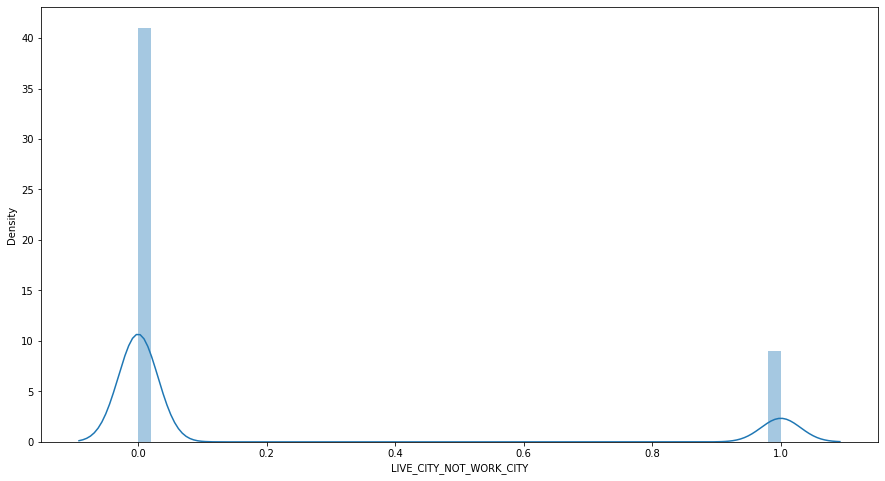

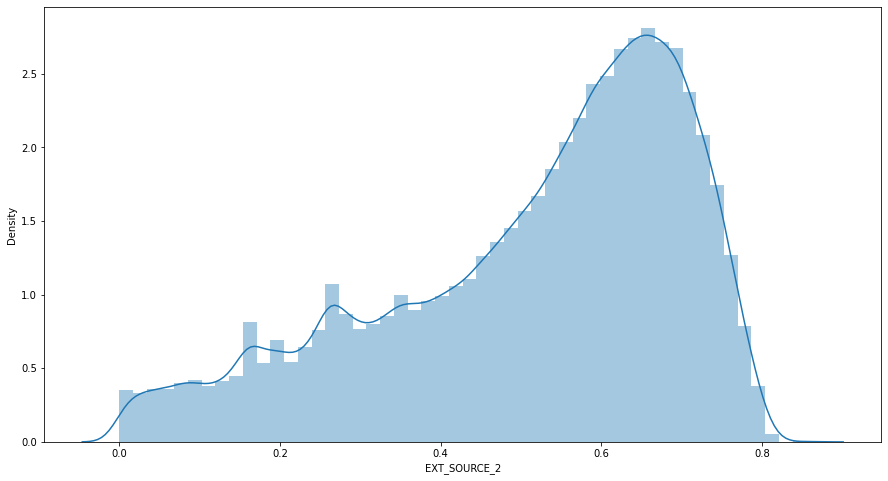

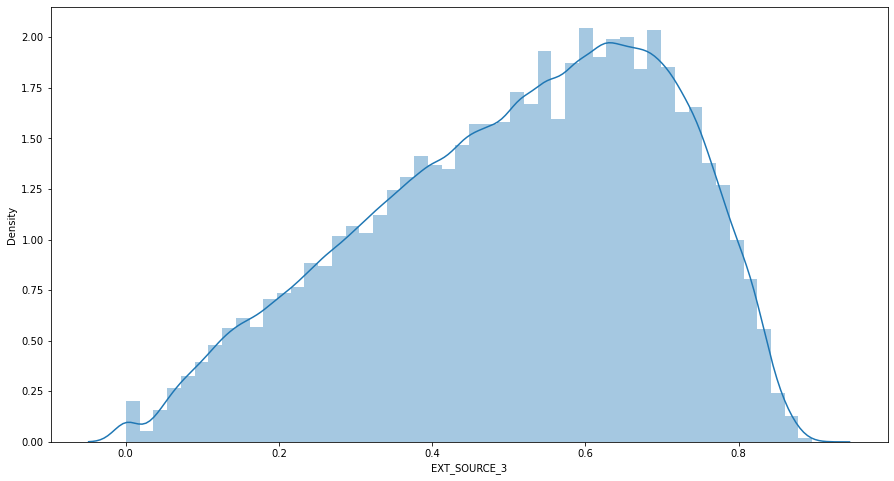

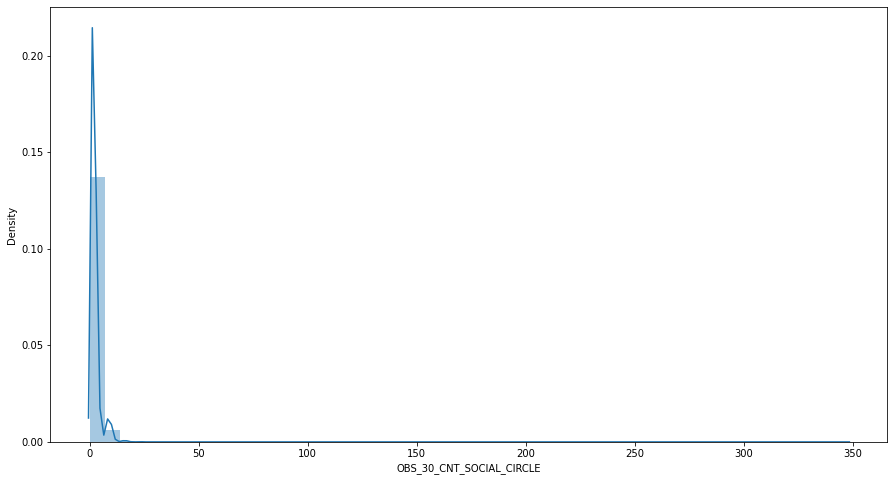

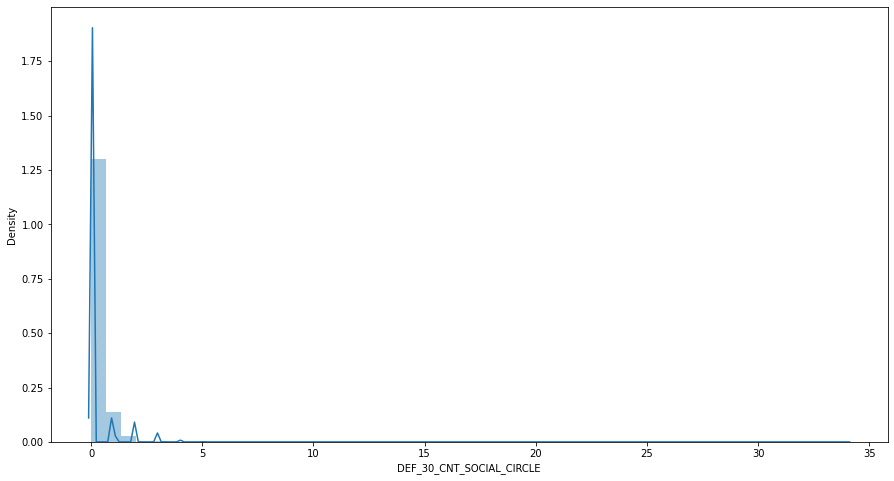

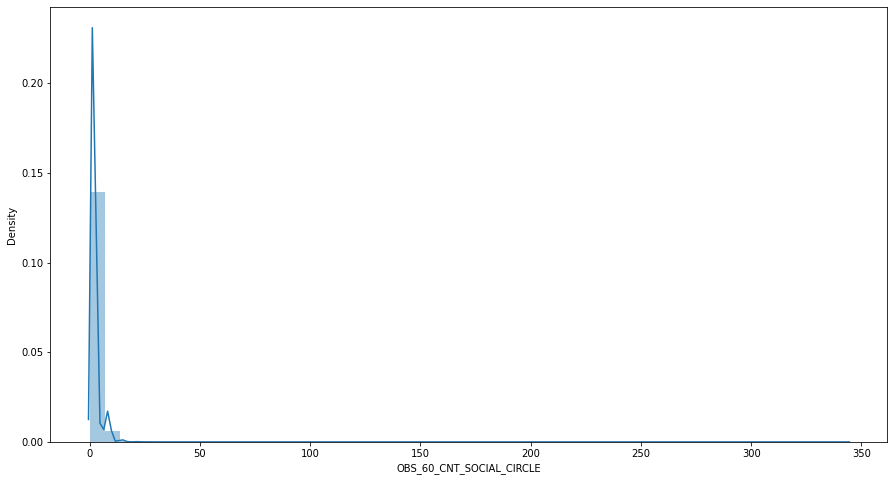

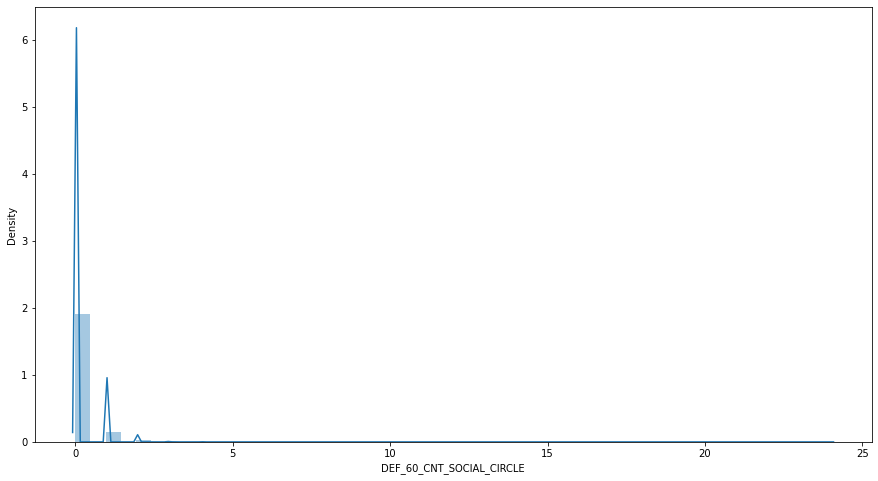

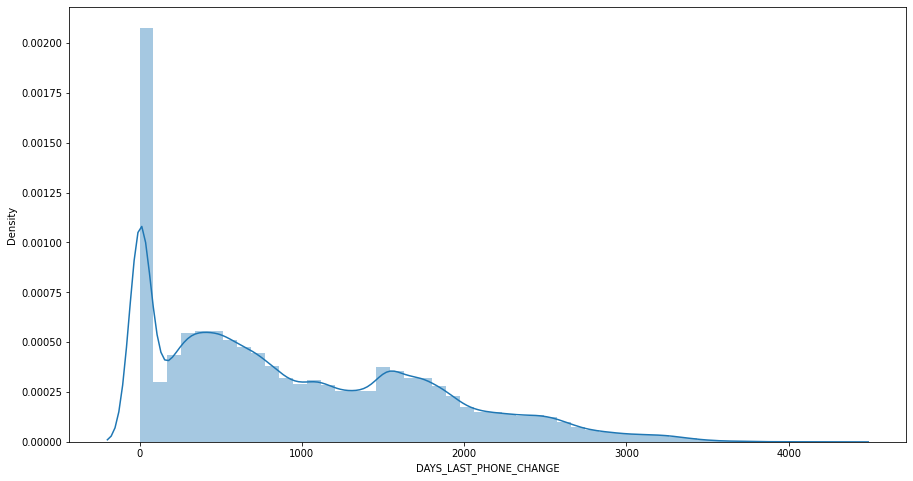

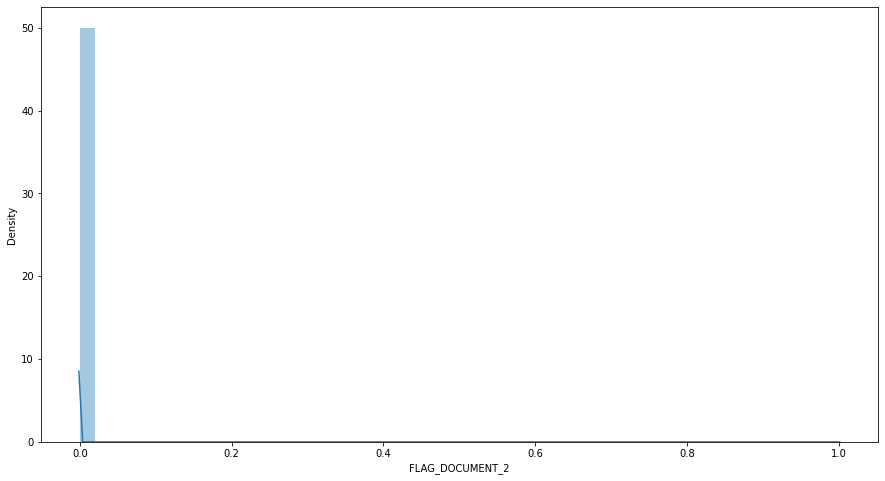

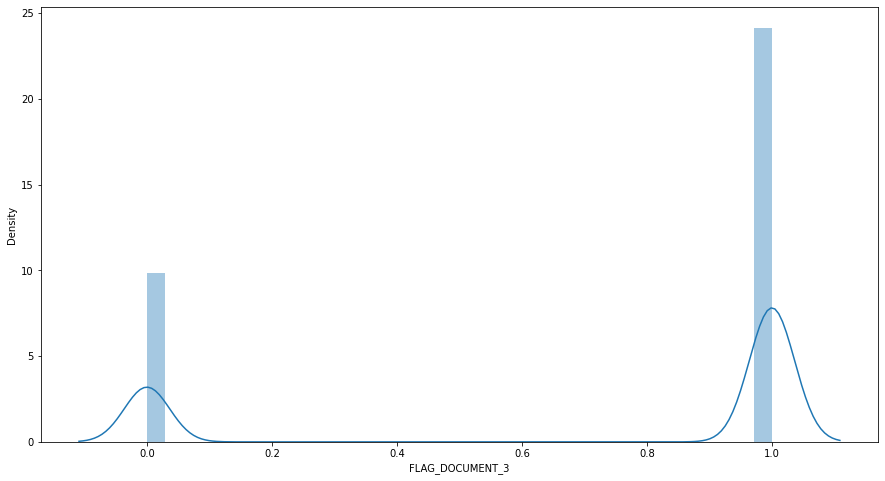

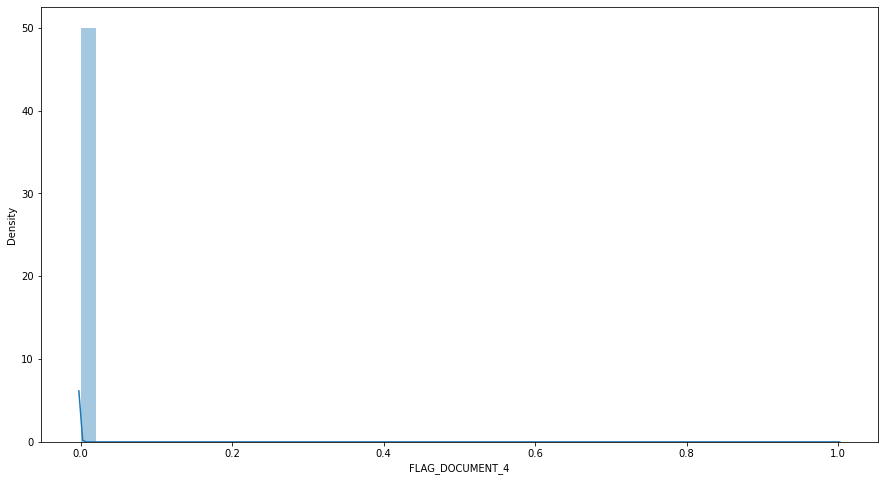

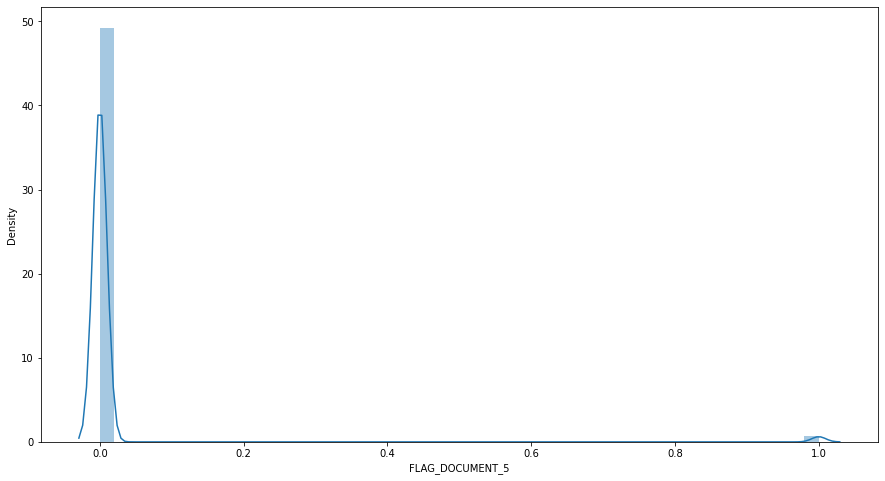

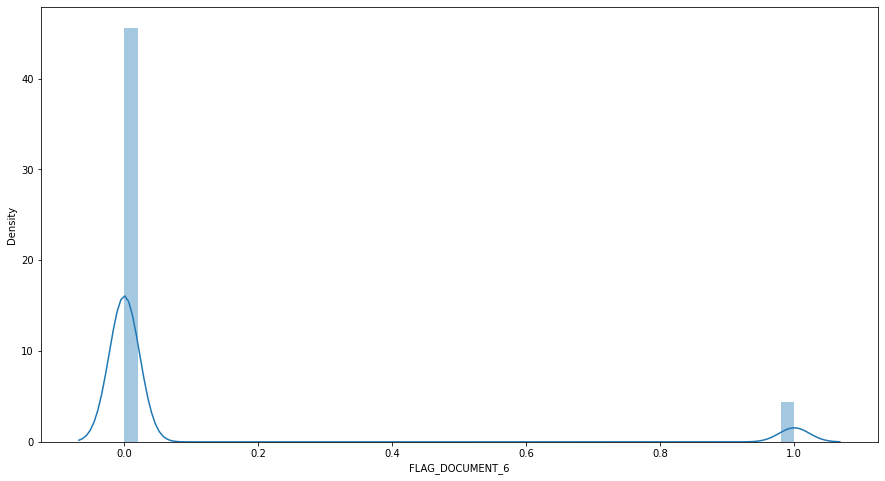

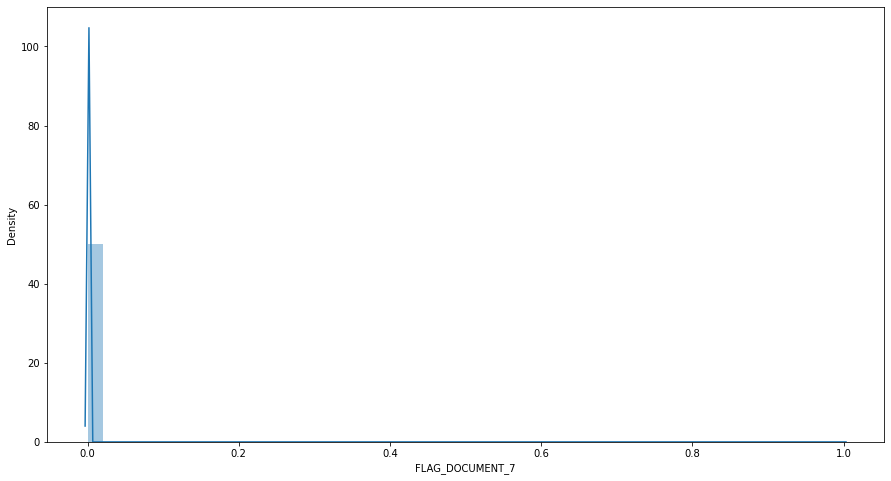

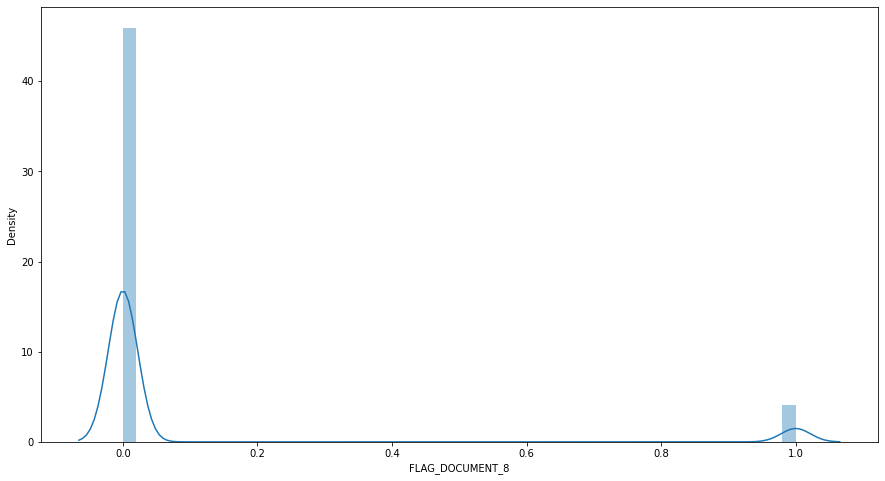

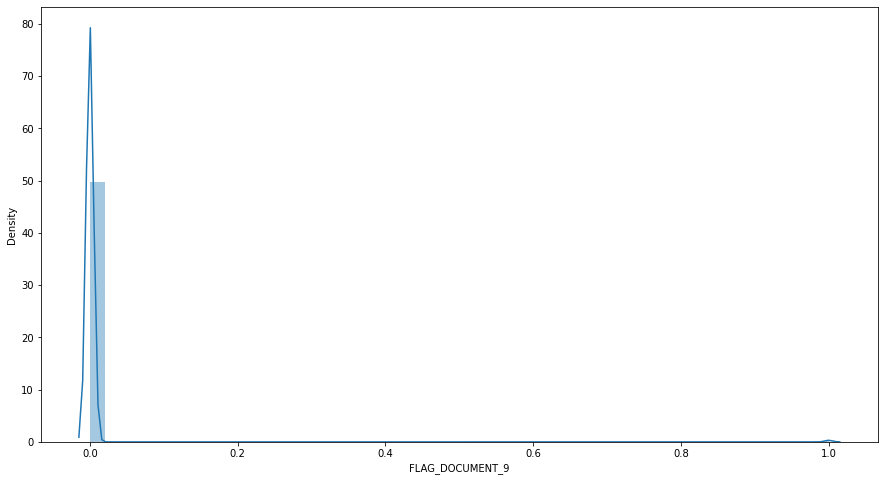

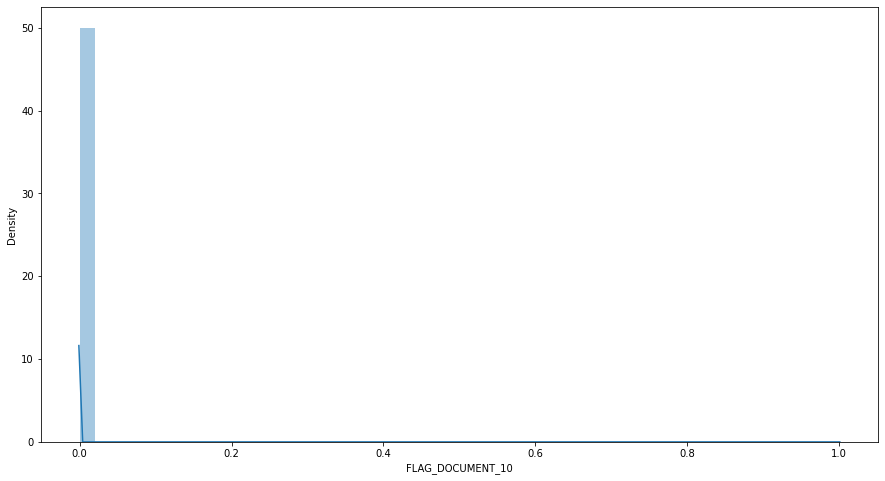

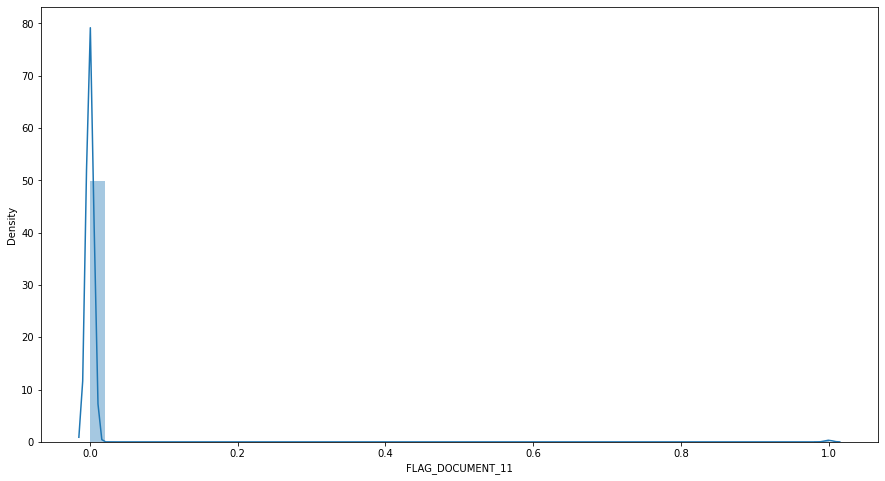

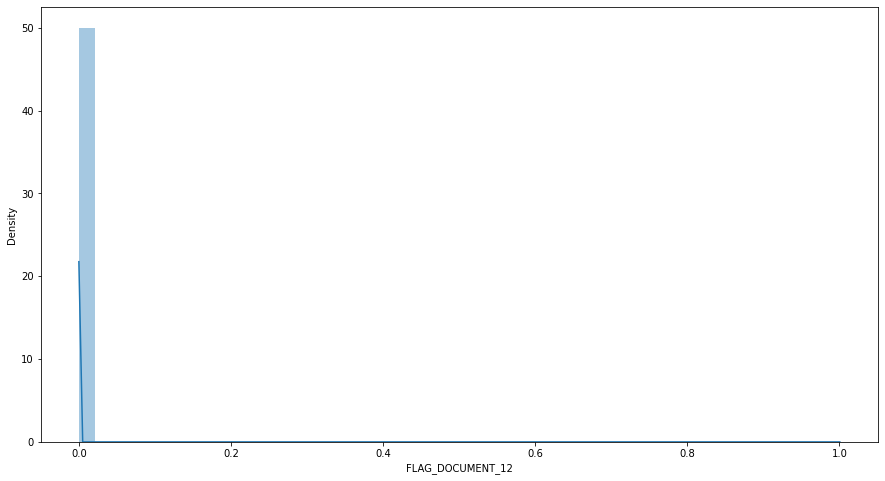

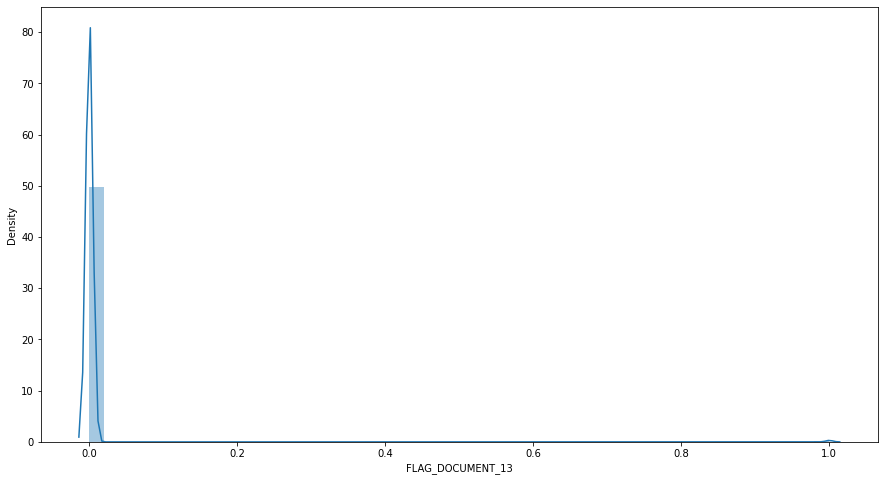

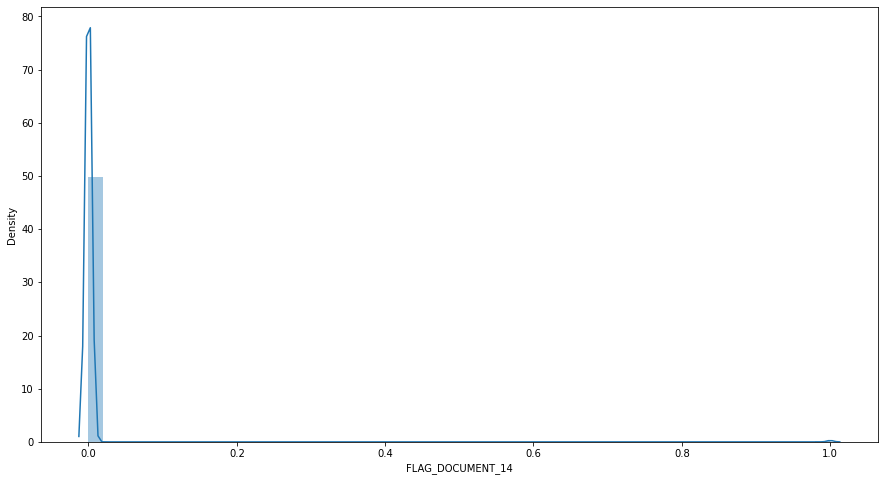

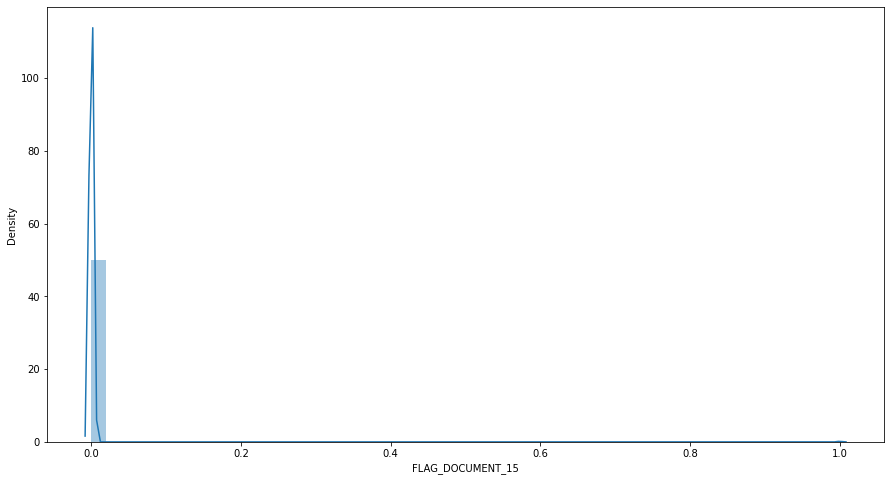

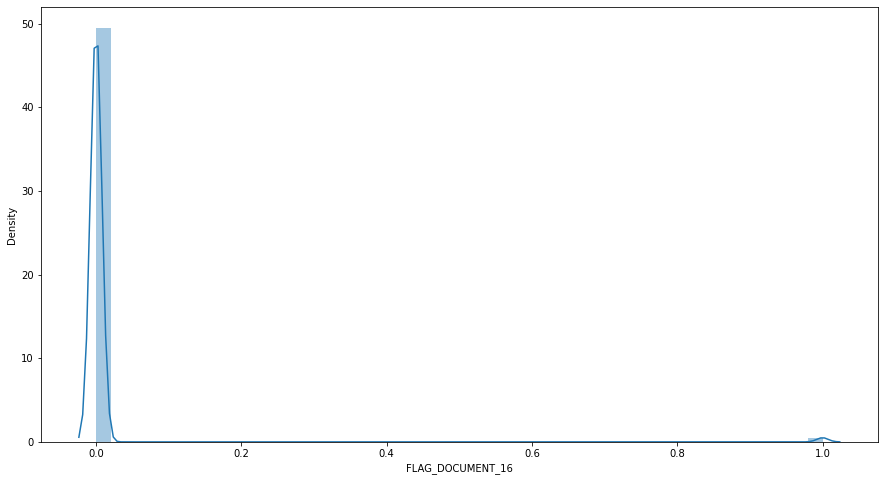

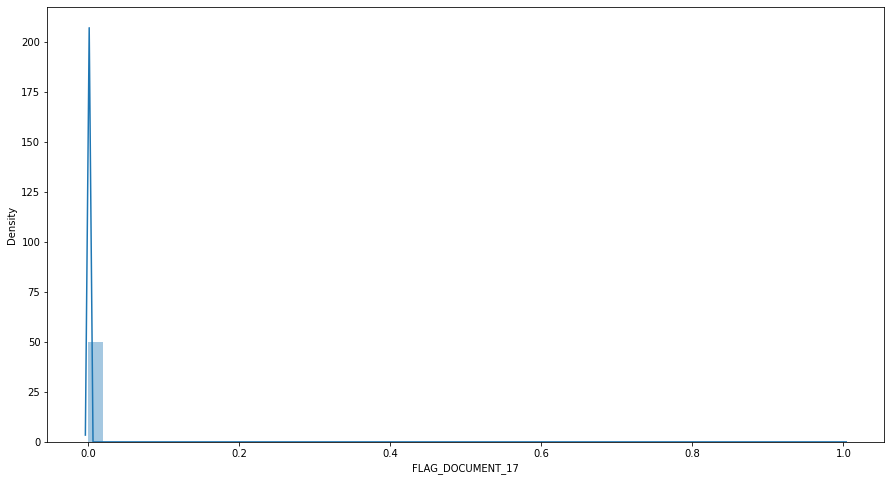

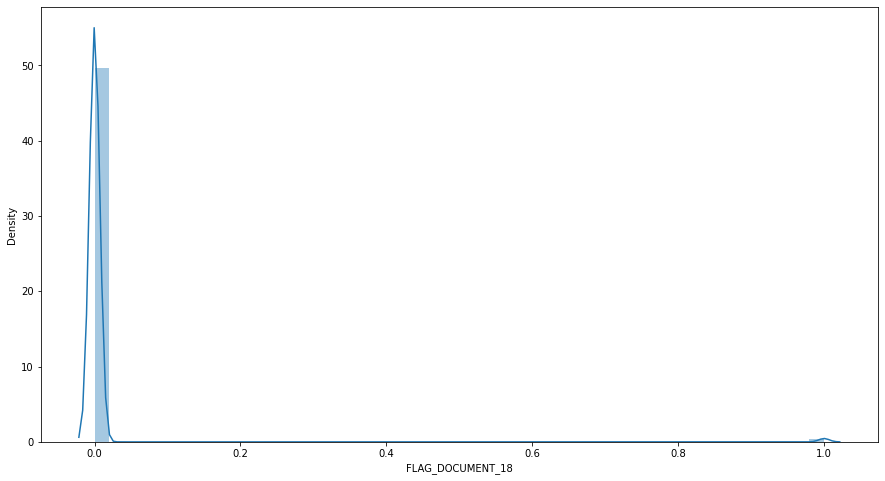

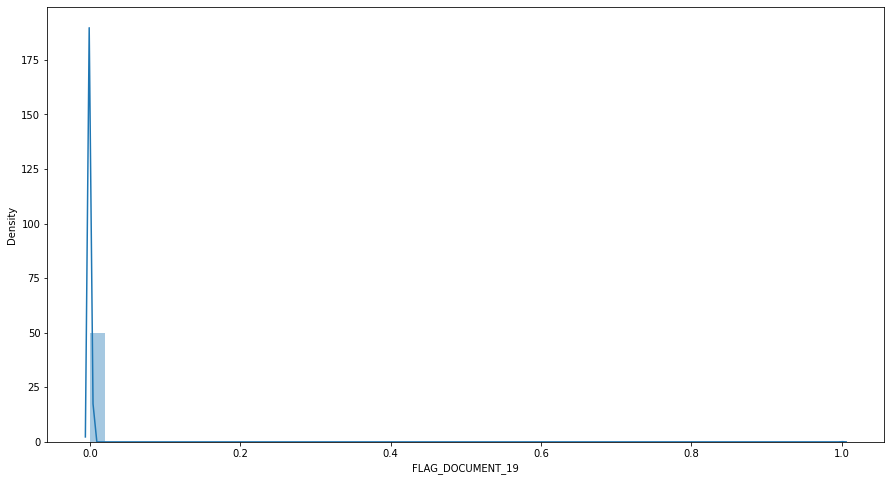

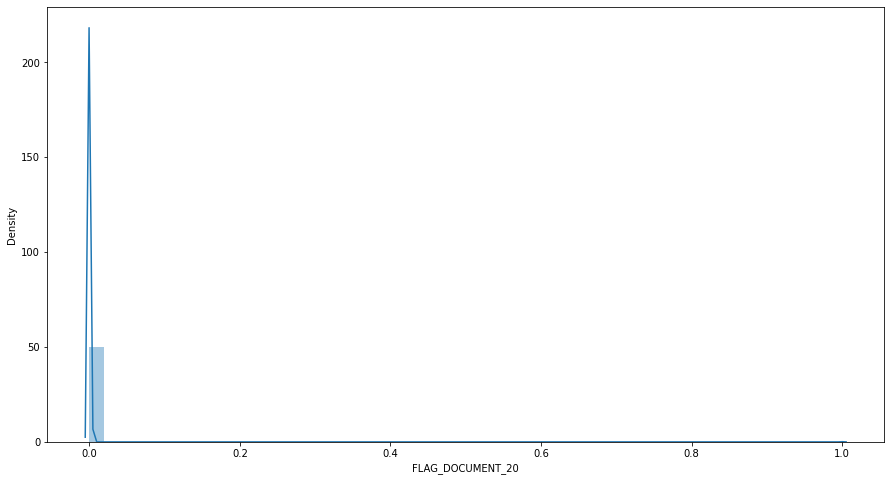

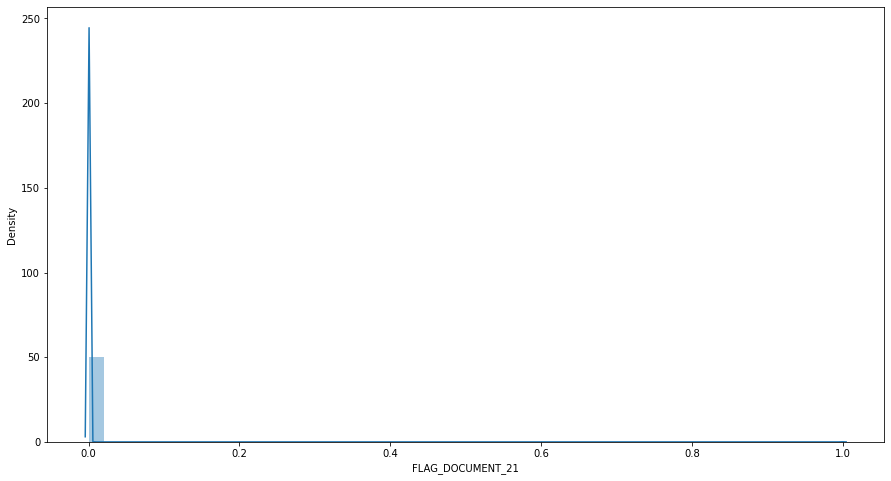

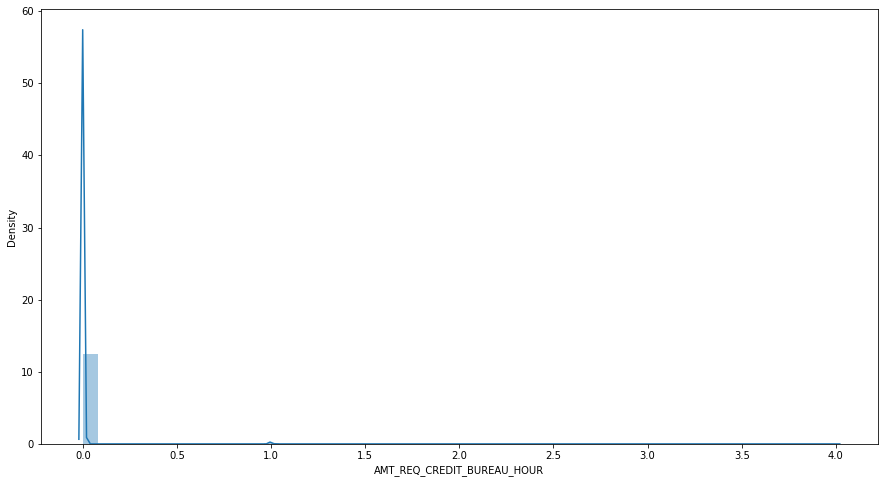

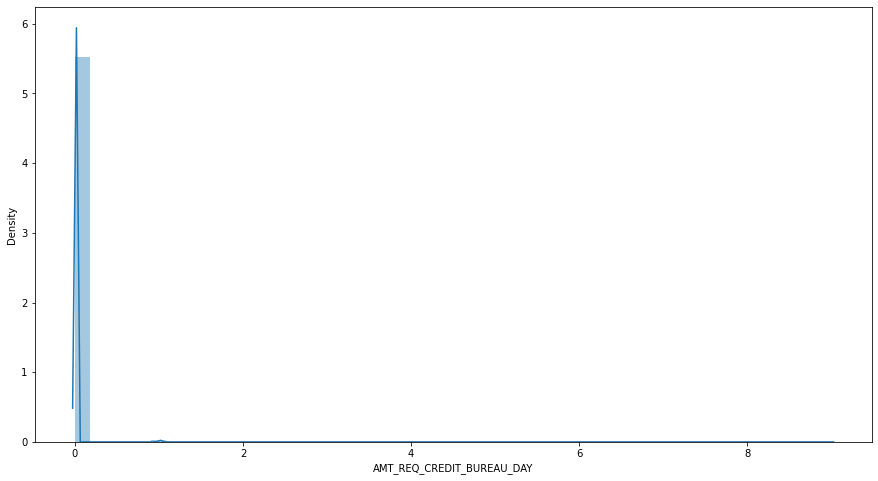

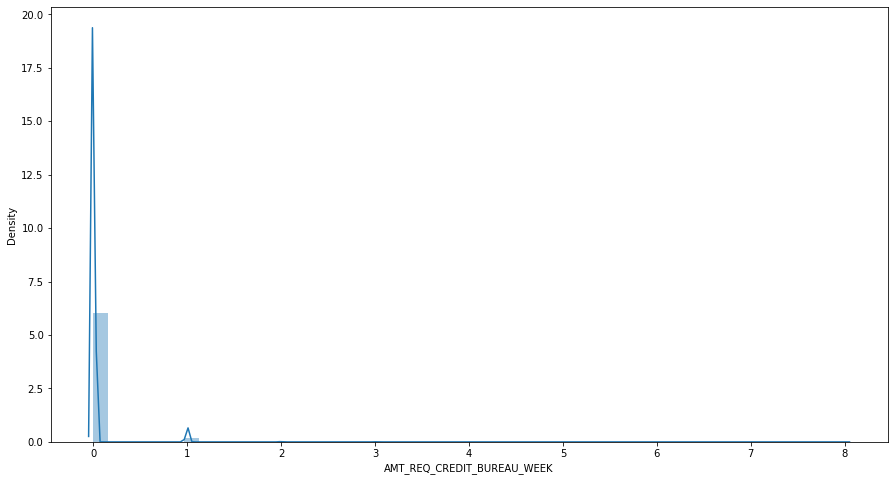

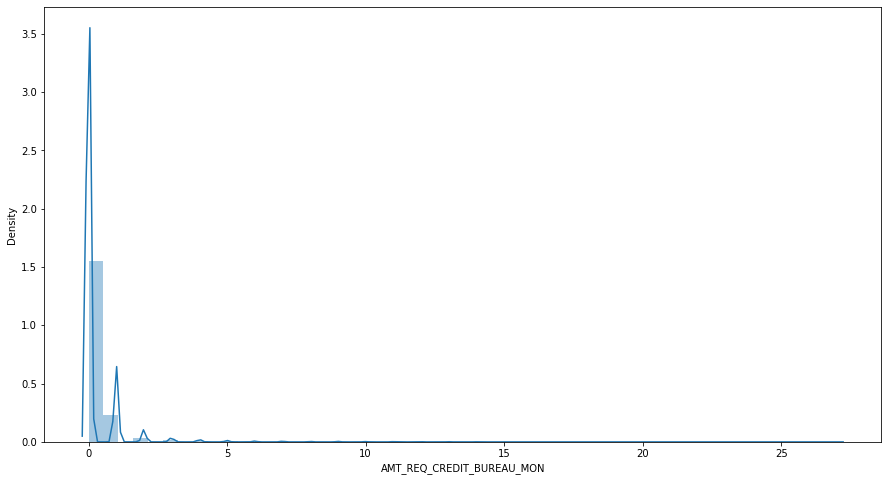

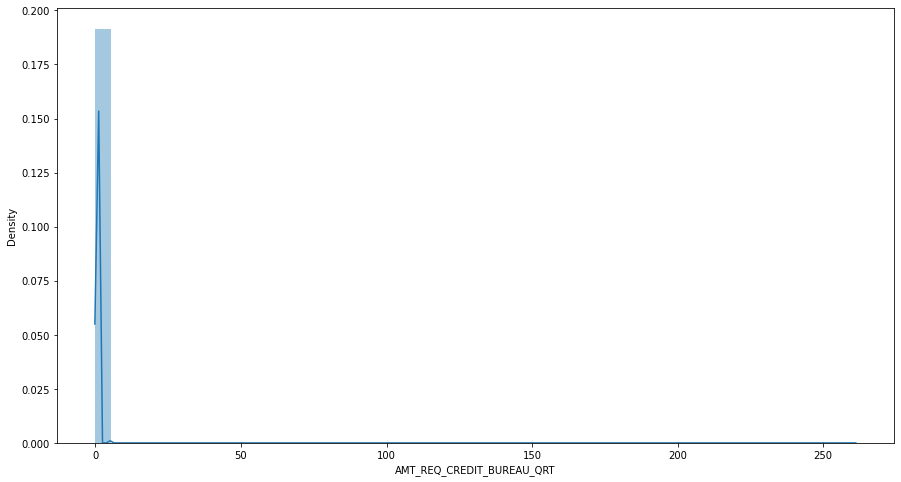

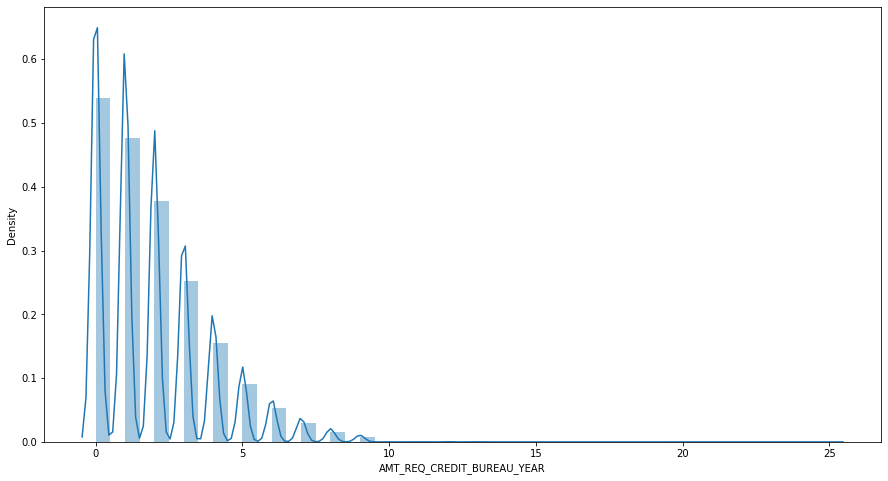

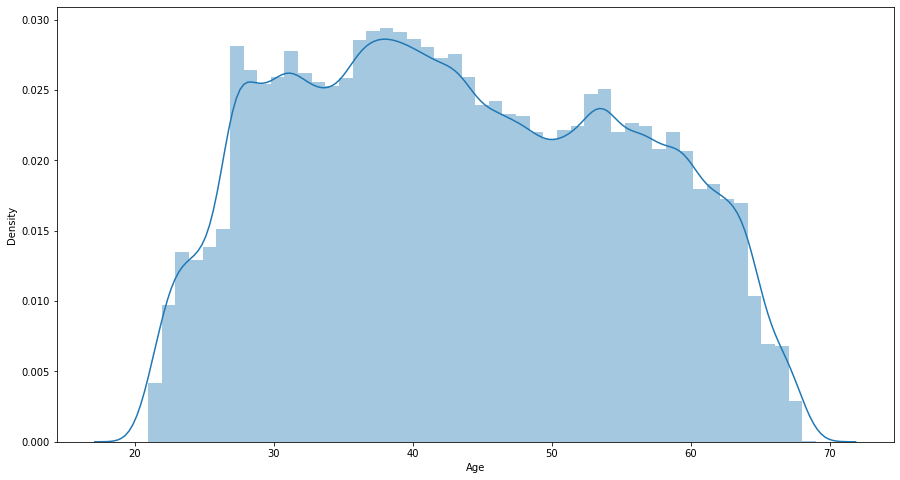

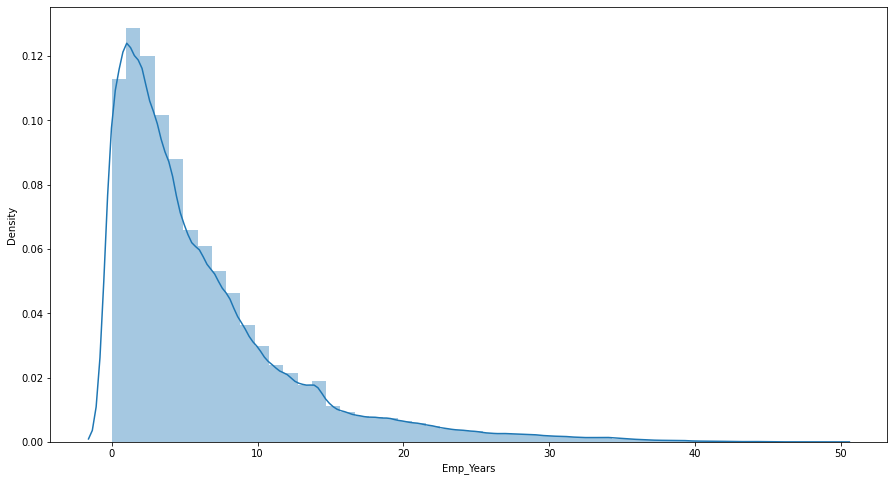

In [32]:
for i in df.columns:
    if df[i].dtype != 'O':
        plt.figure(figsize=(15,8))
        sns.distplot(df[i])

In [33]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                  55374
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [34]:
df['AMT_ANNUITY'].replace(np.NAN,df['AMT_ANNUITY'].mean(),inplace=True)

In [35]:
df[['AMT_ANNUITY','AMT_GOODS_PRICE']].isnull().sum()

AMT_ANNUITY          0
AMT_GOODS_PRICE    278
dtype: int64

In [36]:
df['AMT_GOODS_PRICE'].replace(np.NAN,df['AMT_ANNUITY'].mean(),inplace=True)

In [37]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [38]:
df['NAME_TYPE_SUITE'].replace(np.nan,df['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [39]:
df['EXT_SOURCE_2'].replace(np.nan,df['EXT_SOURCE_2'].mean(),inplace=True)
df['EXT_SOURCE_3'].replace(np.nan,df['EXT_SOURCE_3'].mean(),inplace=True)

In [40]:
df['CNT_FAM_MEMBERS'].replace(np.nan,df['CNT_FAM_MEMBERS'].mode()[0],inplace=True)

In [41]:
obs=["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
for ob in obs :
    df[ob].replace(np.nan,df[ob].mean(),inplace=True)

In [42]:
df['DAYS_LAST_PHONE_CHANGE'].replace(np.nan,df['DAYS_LAST_PHONE_CHANGE'].mode()[0],inplace=True)

In [43]:
df['OCCUPATION_TYPE'].replace(np.nan,df['OCCUPATION_TYPE'].mode()[0],inplace=True)

In [44]:
rest = ['OCCUPATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'
       ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in rest :
    df[i].replace(np.nan,df[i].mode()[0],inplace=True)

In [45]:
df['DAYS_EMPLOYED'].replace(np.nan,df['DAYS_EMPLOYED'].median(),inplace=True)
df['Emp_Years'].replace(np.nan,df['Emp_Years'].median(),inplace=True)

In [46]:
df.isnull().sum().sum()

0

In [47]:
df.drop(['SK_ID_CURR'],axis=1,inplace=True)

In [48]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [49]:
re = ['Other_B','Other_A','Group of people']
df['NAME_TYPE_SUITE'].replace(re,'Other',inplace=True)

In [50]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other                2907
Name: NAME_TYPE_SUITE, dtype: int64

In [51]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [52]:
re=['Student','Maternity leave']
df['NAME_INCOME_TYPE'].replace(re,'Unemployed',inplace=True)

In [53]:
df.duplicated().sum()

0

### EDA

### Which people is the most common?

In [54]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

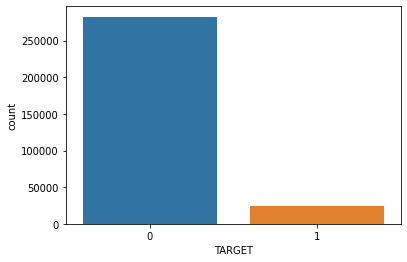

In [55]:
sns.countplot(x=df['TARGET'],data=df)

People that doesn't has payment difficulties is the most common

### Correlation

In [56]:
df2 = df.select_dtypes(np.number)
df2

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Emp_Years
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637.0,3648.0,2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188.0,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225.0,4260.0,2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039.0,9833.0,2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8.0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038.0,4311.0,3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,236.0,8456.0,1982,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.681632,0.510853,0.0,0.0,0.0,0.0,273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,25,0.0
307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,1648.0,4388.0,4090,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.115992,0.510853,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,56,4.0
307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,7921.0,6737.0,5150,1,1,0,1,0,1,1.0,3,3,9,0,0,0,0,1,1,0.535722,0.218859,6.0,0.0,6.0,0.0,1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41,21.0
307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,4786.0,2562.0,931,1,1,0,1,0,0,2.0,2,2,9,0,0,0,1,1,0,0.514163,0.661024,0.0,0.0,0.0,0.0,322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32,13.0


In [57]:
df2.drop("TARGET", axis=1).apply(lambda x: x.corr(df2.TARGET) )

CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039570
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                 -0.063368
DAYS_REGISTRATION             -0.041975
DAYS_ID_PUBLISH               -0.051457
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
HOUR_APPR_PROCESS_START       -0.024166
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
LIVE_REGION_NOT_WORK_REGION    0.002819
REG_CITY_NOT_LIVE_CITY         0.044395
REG_CITY_NOT_WORK_CITY         0.050994


### Does having children affects the difficulty?

<AxesSubplot:xlabel='TARGET', ylabel='count'>

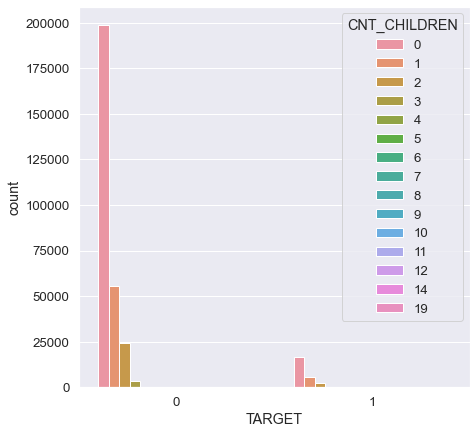

In [58]:
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
sns.countplot(x=df['TARGET'],data=df,hue=df['CNT_CHILDREN'])

In [59]:
def rangee(x):
    if x> 3:
        return 'more_than3'
    else:
        return 'less_than3'
df['Range_Child'] = df['CNT_CHILDREN'].apply(rangee)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

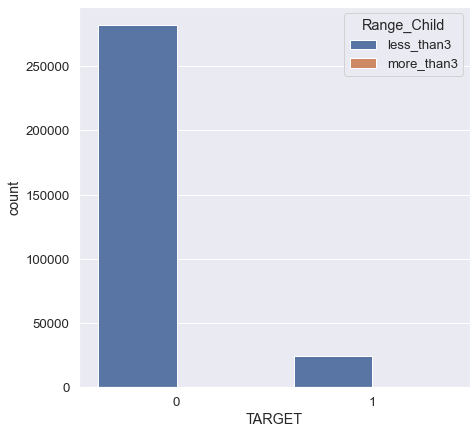

In [60]:
sns.countplot(x=df['TARGET'],data=df,hue=df['Range_Child'])

seems that people that has zero or less than 3 children has no difficulties  

### Does Number of family members affects the person's ability to get a loan or not?

<AxesSubplot:xlabel='TARGET', ylabel='count'>

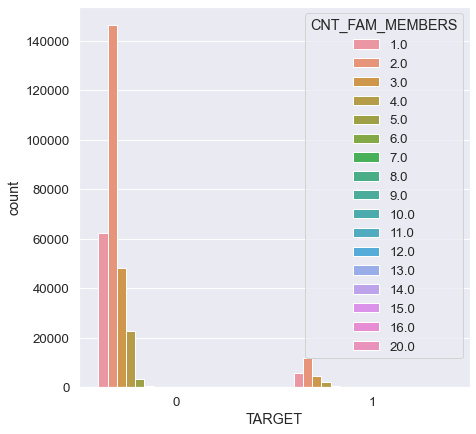

In [61]:
sns.countplot(x=df['TARGET'],hue=df['CNT_FAM_MEMBERS'],data=df)

In [62]:
df2['CNT_FAM_MEMBERS'].corr(df['TARGET'])

0.009308103988657838

seems that it doesn't affect , and the correlation is very weak 0.9 %

### Which Gender has more difficulties?

<AxesSubplot:xlabel='TARGET', ylabel='count'>

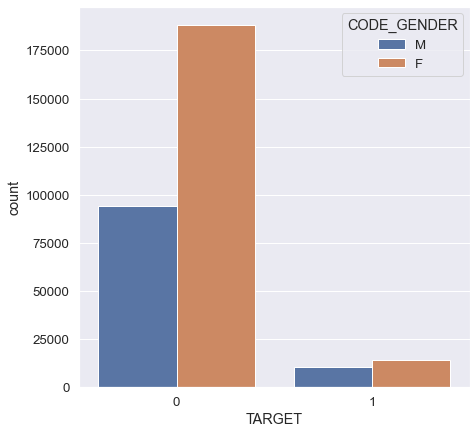

In [63]:
sns.countplot(x=df['TARGET'],data=df,hue=df['CODE_GENDER'])

Females has high difficulties than men

In [64]:
gender={'F':0 , 'M':1}
df['CODE_GENDER'].replace(gender,inplace=True)

In [65]:
df['CODE_GENDER'].corr(df['TARGET'])

0.05471268197127152

### Does Income affects the Target

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

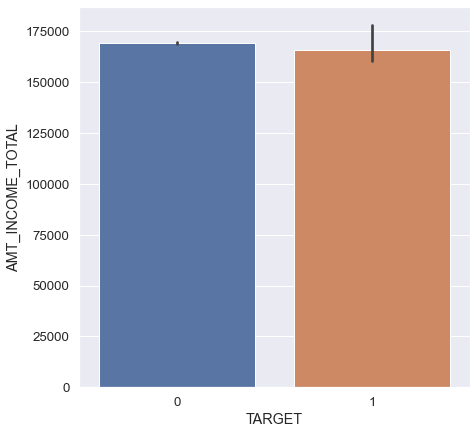

In [66]:
sns.barplot(x=df['TARGET'],y=df['AMT_INCOME_TOTAL'],data=df)

In [67]:
df['AMT_INCOME_TOTAL'].corr(df['TARGET'])

-0.003981865601205655

Both are close to each other but people who doesn't have difficulties has total income with mean about 170,000 

### Does the type of contract makes difficulties, and does it differs from men to women?

<AxesSubplot:xlabel='TARGET', ylabel='count'>

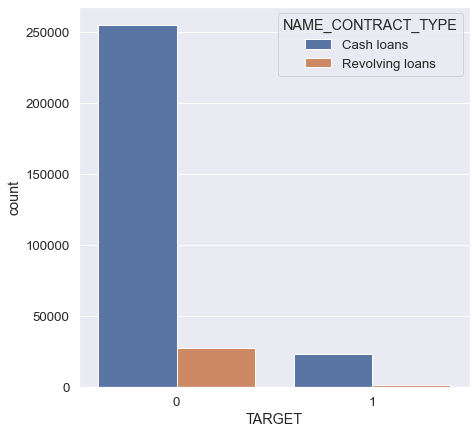

In [68]:
sns.countplot(x=df['TARGET'],hue=df['NAME_CONTRACT_TYPE'])

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

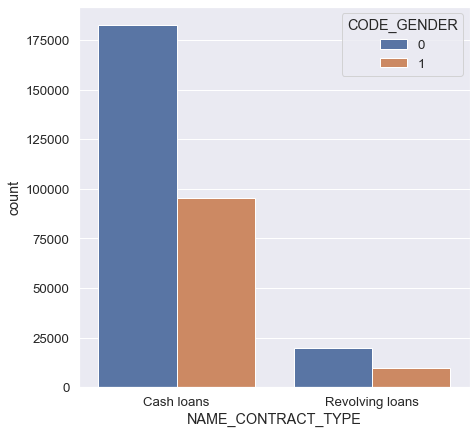

In [69]:
sns.countplot(x=df['NAME_CONTRACT_TYPE'],hue=df['CODE_GENDER'])

In [70]:
df['NAME_CONTRACT_TYPE'].replace({'Cash loans':0,'Revolving loans':1}).corr(df['TARGET']) 

-0.0308959081610478

Females prefers Cash loans compared to men

### Age of people that has difficulties?

In [71]:
difficulties=df[df['TARGET']==1]
difficulties

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Emp_Years,Range_Child
0,1,Cash loans,1,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637.0,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0,less_than3
26,1,Cash loans,0,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628.0,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51,7.0,less_than3
40,1,Cash loans,1,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262.0,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,47,3.0,less_than3
42,1,Cash loans,0,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597.0,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,36,9.0,less_than3
81,1,Cash loans,0,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,1648.0,5391.0,4199,1,0,0,1,0,0,Laborers,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,67,4.0,less_than3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,1,Cash loans,1,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,9918,3048.0,8507.0,2580,1,1,1,1,0,0,Laborers,3.0,3,3,MONDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.329708,0.360613,0.0,0.0,0.0,0.0,324.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,27,8.0,less_than3
307475,1,Cash loans,0,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher

C:\Users\argal\AppData\Local\Temp\ipykernel_13572\135968262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(difficulties['Age']);


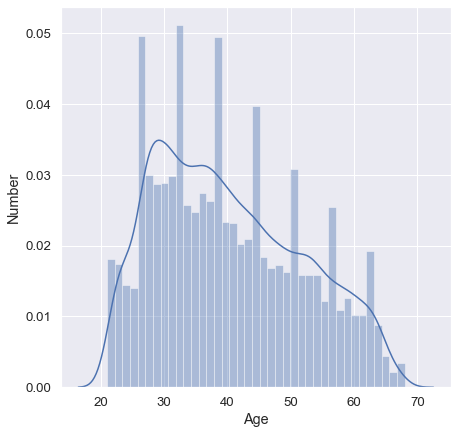

In [72]:
sns.distplot(difficulties['Age']);
plt.xlabel('Age')
plt.ylabel('Number');

Most people that has difficulties ranger between 27 to 50

### People who has car?

Text(0.5, 0, 'Gender')

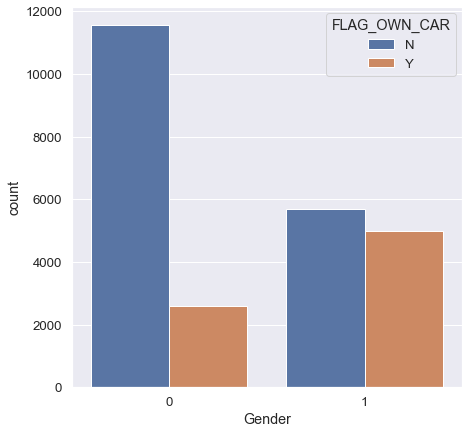

In [73]:
sns.countplot(x=difficulties['CODE_GENDER'],hue=difficulties['FLAG_OWN_CAR'])
plt.xlabel('Gender')

It seems that Females and males that doesn't own car has more difficulties than those who don't

<AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY'>

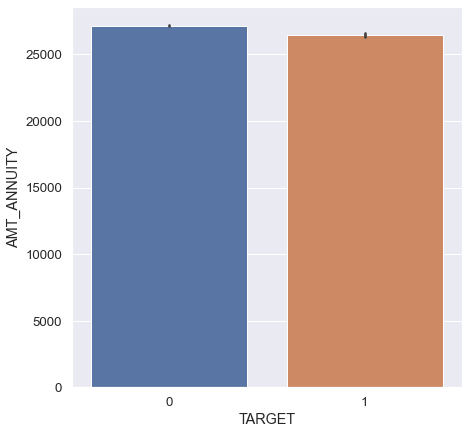

In [74]:
sns.barplot(x=df['TARGET'],y=df['AMT_ANNUITY'])

### Does Education type differs between people and income?

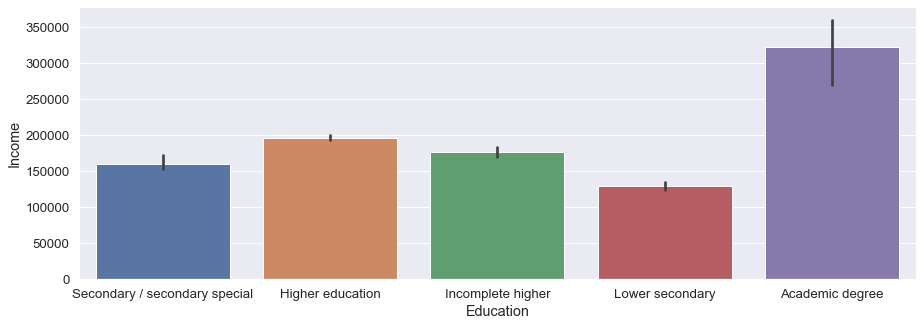

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL',order = difficulties['NAME_EDUCATION_TYPE'].value_counts().index ,data=difficulties)
plt.xlabel('Education')
plt.ylabel('Income');

In [76]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [77]:
education ={'Secondary / secondary special':0,'Higher education':1,'Incomplete higher':2,'Lower secondary':3,'Academic degree':4}
df['NAME_EDUCATION_TYPE'].replace(education).corr(df['TARGET'])

-0.03243396291520085

Most people who has difficulties is people who has Academic degree with Income about 325000 $

<AxesSubplot:xlabel='TARGET', ylabel='count'>

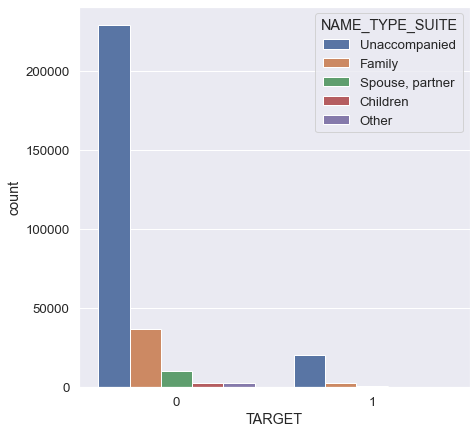

In [79]:
sns.countplot(x=df['TARGET'],hue=df['NAME_TYPE_SUITE'])

Most people who has difficulties come to get loan alone

### Occupation Type?

<AxesSubplot:xlabel='count', ylabel='OCCUPATION_TYPE'>

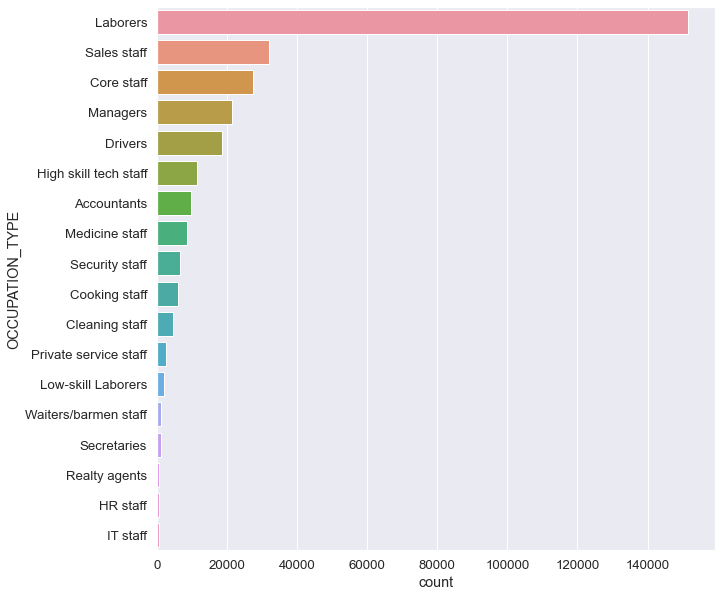

In [81]:
plt.figure(figsize=(10,10))
sns.countplot(data = df,y="OCCUPATION_TYPE", order = df.OCCUPATION_TYPE.value_counts().index)

Laborers is the most common

### Which region is the most comon?

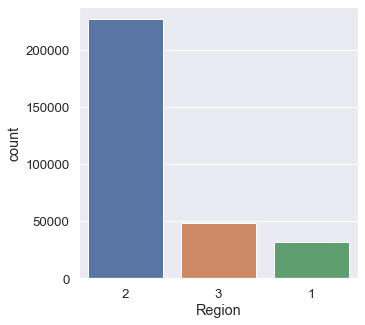

In [84]:
plt.figure(figsize=(5,5))
sns.countplot(data = df,x="REGION_RATING_CLIENT", order = df.REGION_RATING_CLIENT.value_counts().index)
plt.xlabel('Region');

Seems that Region with rating 2 is the most common

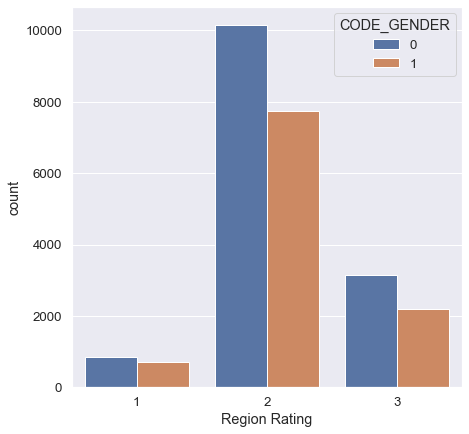

In [89]:
sns.countplot(x=difficulties['REGION_RATING_CLIENT'],hue=difficulties['CODE_GENDER'])
plt.xlabel('Region Rating');

Seems that Region 2 has the most common people with difficulties especially Females

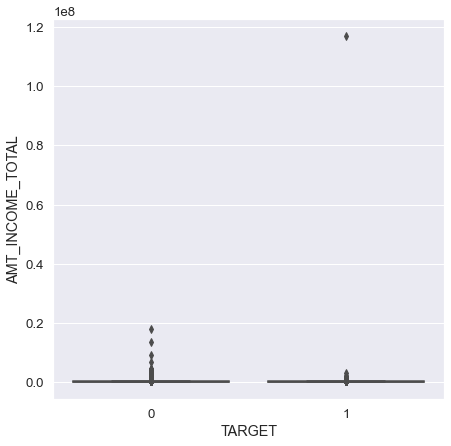

In [93]:
sns.boxplot(x=df['TARGET'],y=df['AMT_INCOME_TOTAL']);

### What is the status of  both people who has difficulties and not?

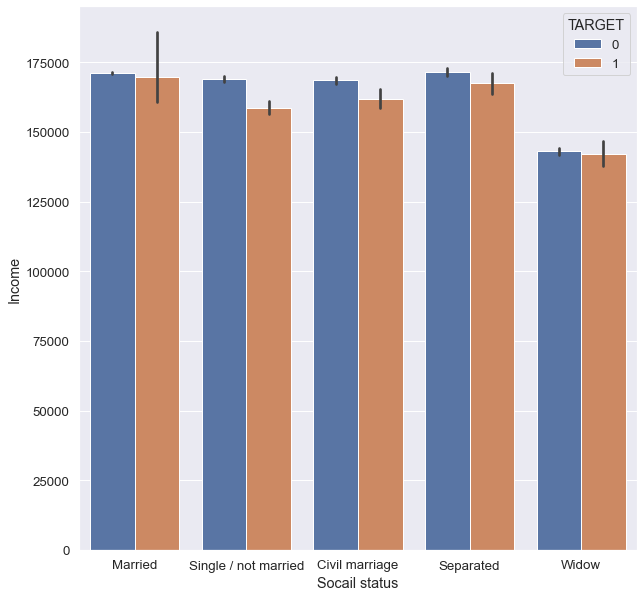

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(x=df["NAME_FAMILY_STATUS"],y=df['AMT_INCOME_TOTAL'],hue=df['TARGET'],order= df['NAME_FAMILY_STATUS'].value_counts().index)
plt.xlabel('Socail status')
plt.ylabel('Income');

seems that people who is married and has no difficulties is the most and has income about 170,000$
while widows has the least income and least difficulties

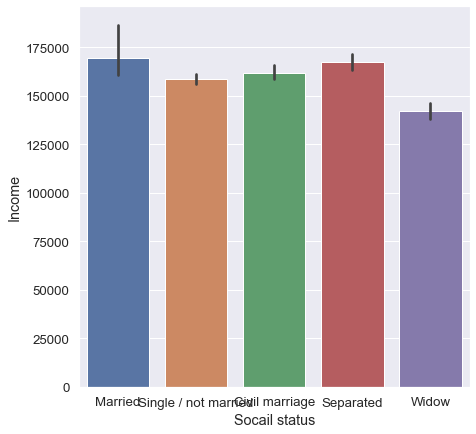

In [105]:
sns.barplot(x=difficulties['NAME_FAMILY_STATUS'],y=difficulties['AMT_INCOME_TOTAL'],order= difficulties['NAME_FAMILY_STATUS'].value_counts().index)
plt.xlabel('Socail status')
plt.ylabel('Income');

people who is married has the most difficulties

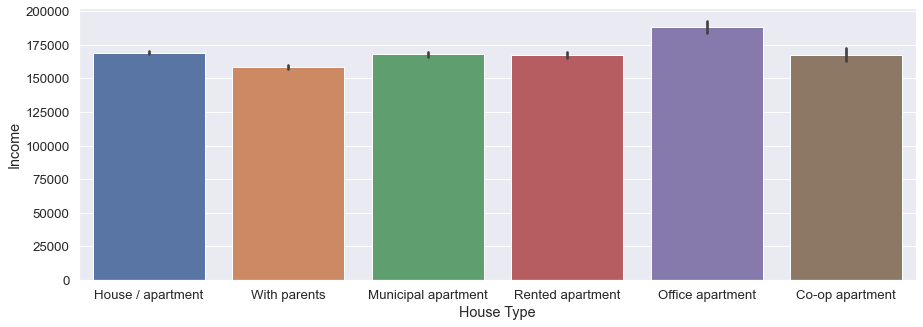

In [111]:
plt.figure(figsize=(15,5))
sns.barplot(data = df,x="NAME_HOUSING_TYPE",y='AMT_INCOME_TOTAL' ,order = df.NAME_HOUSING_TYPE.value_counts().index)
plt.xlabel('House Type')
plt.ylabel('Income');

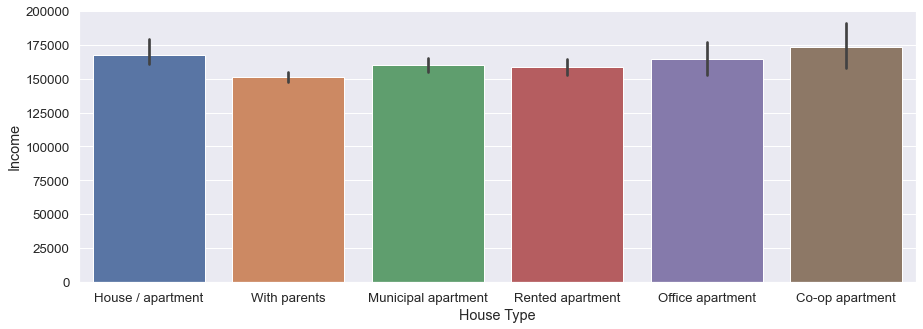

In [113]:
plt.figure(figsize=(15,5))
sns.barplot(data = difficulties,x="NAME_HOUSING_TYPE",y='AMT_INCOME_TOTAL' ,order = difficulties.NAME_HOUSING_TYPE.value_counts().index)
plt.xlabel('House Type')
plt.ylabel('Income');

People who lives in Co-op apartment has highest income and has the difficulties